# Lead Scoring Case Study


#### Problem Statement:

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

#### Goal: 

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

In [3]:
# To import the data
df_leads_original = pd.read_csv('Lead scoring case study upgrad.csv')

# To keep an original copy
df_leads = df_leads_original.copy()
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Data Inspection

In [4]:
df_leads.shape

(9240, 37)

In [5]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

All variables have proper data types.

### Data Cleaning

In [7]:
# To check for duplicates
df_leads.loc[df_leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicates in the data!

In [8]:
# To check for duplicates in columns
print(sum(df_leads.duplicated(subset = 'Lead Number')))
print(sum(df_leads.duplicated(subset = 'Prospect ID')))

0
0


As the values in these columns are different for each entry/row, there are just indicative of the ID and are not important from an analysis point of view. Hence, can be dropped.

In [9]:
df_leads = df_leads.drop(['Lead Number','Prospect ID'],axis=1)

As it can be seen, there are select values in many columns. This means that the person did not select any option for the given field. Hence, these are like NULL values.

In [10]:
# To convert 'Select' values to NaN
df_leads = df_leads.replace('Select', np.nan)

In [11]:
# To get percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

We'll drop columns with more than 50% of missing values. But the variable 'Lead Quality', which has 51.6% missing values seems promising. So we'll keep it for now.

In [12]:
# To drop columns with more than 50% of missing values
df_leads = df_leads.drop(df_leads.loc[:,list(round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)>52)].columns, axis=1)

For other columns, we have to work on column by column basis. <br>
- For categorical variables, we'll analyse the count/percentage plots.
- For numerical variable, we'll describe the variable and analyse the box plots.

In [13]:
# Function for percentage plots
def percent_plot(var):
    values = (df_leads[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

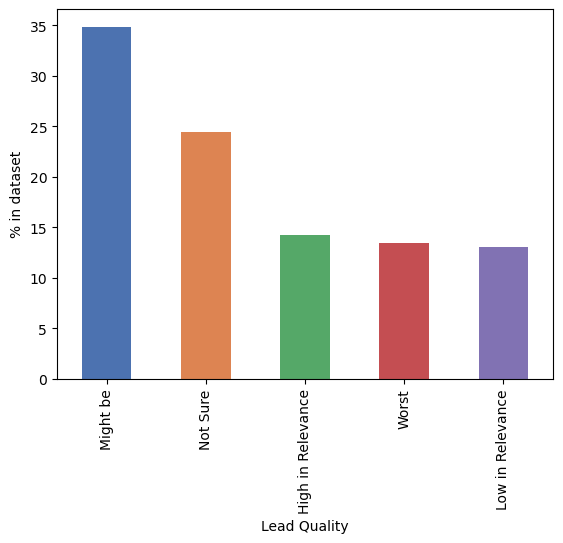

In [14]:
# For Lead Quality
percent_plot('Lead Quality')

Null values in the 'Lead Quality' column can be imputed with the value 'Not Sure' as we can assume that not filling in a column means the employee does not know or is not sure about the option.

In [15]:
df_leads['Lead Quality'] = df_leads['Lead Quality'].replace(np.nan, 'Not Sure')

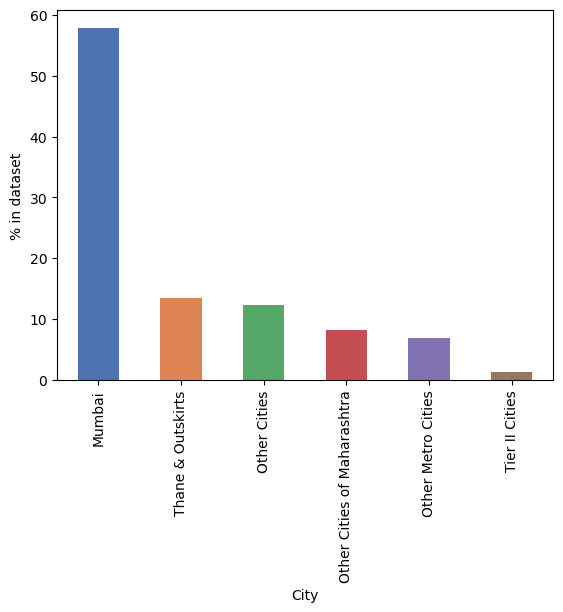

In [16]:
# For 'City'
percent_plot('City')

Around 60% of the City values are Mumbai. We can impute 'Mumbai' in the missing values. 

In [17]:
df_leads['City'] = df_leads['City'].replace(np.nan, 'Mumbai')

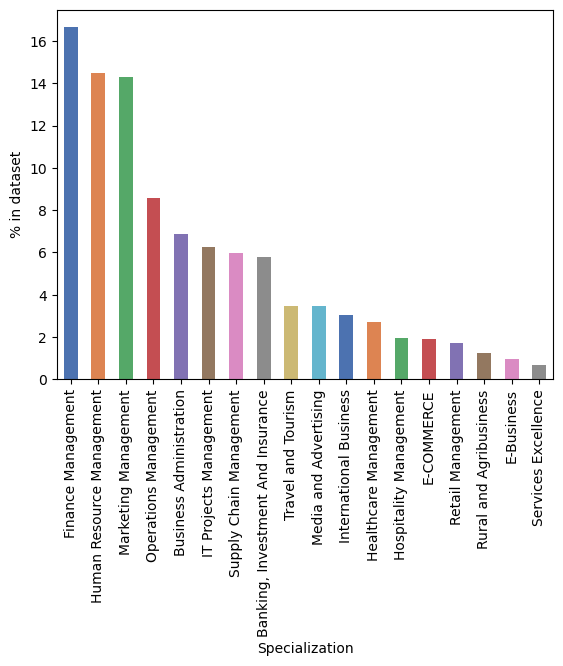

In [18]:
# For 'Specialization'
percent_plot('Specialization')

There are a lot of different specializations and it's not accurate to directly impute with the mean. We can create a new column for that.

In [19]:
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Others')

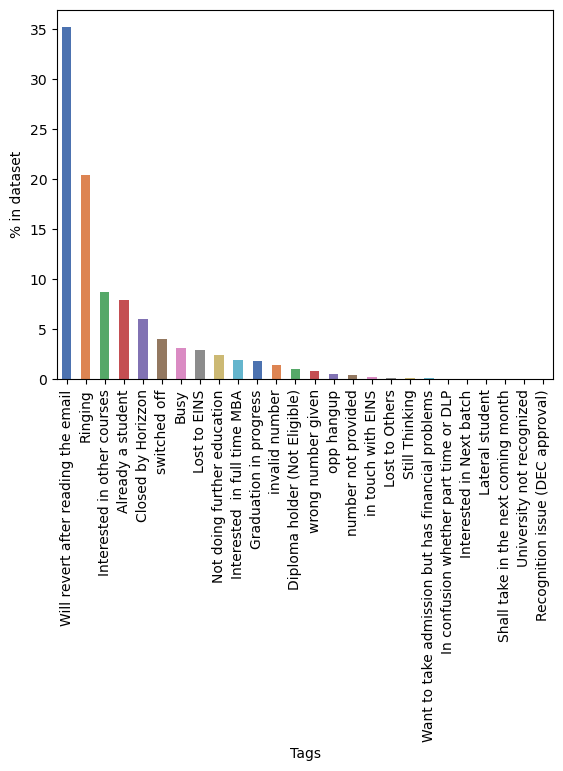

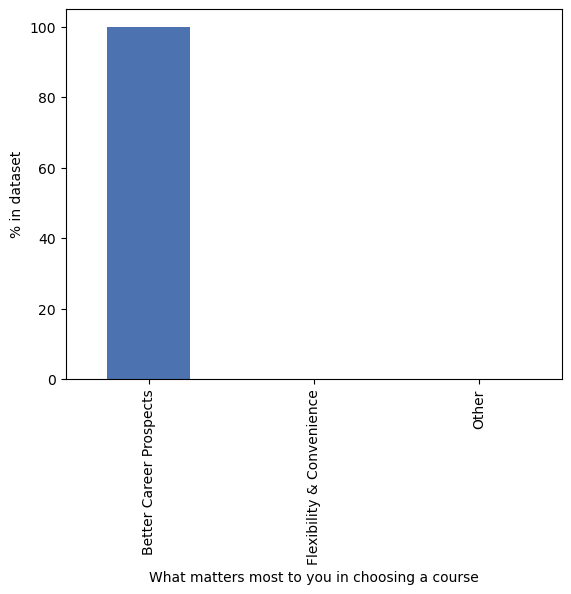

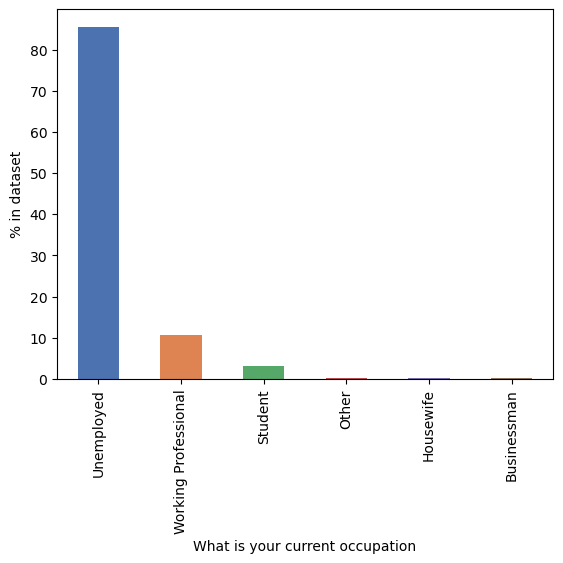

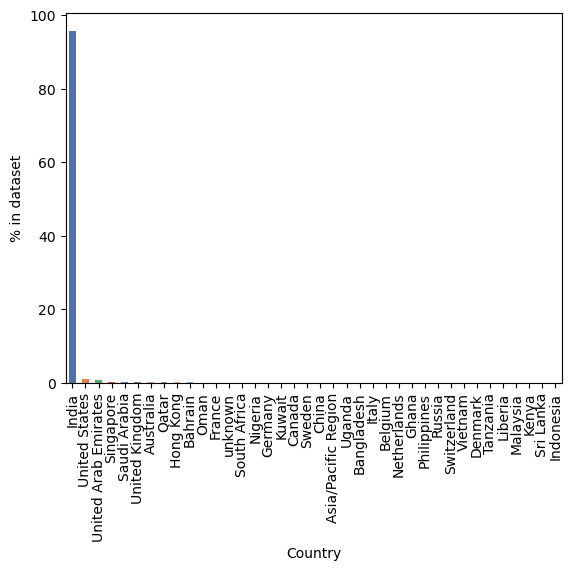

In [20]:
# For 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation' and 'Country'
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']

for var in var_list:
    percent_plot(var)
    plt.show()

In all these categorical variables, one value is clearly more frequent than all others. So it makes sense to impute with the most frequent values.

In [21]:
# To impute with the most frequent value
for var in var_list:
    top_frequent = df_leads[var].describe()['top']
    df_leads[var] = df_leads[var].replace(np.nan, top_frequent)

In [22]:
# To get percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

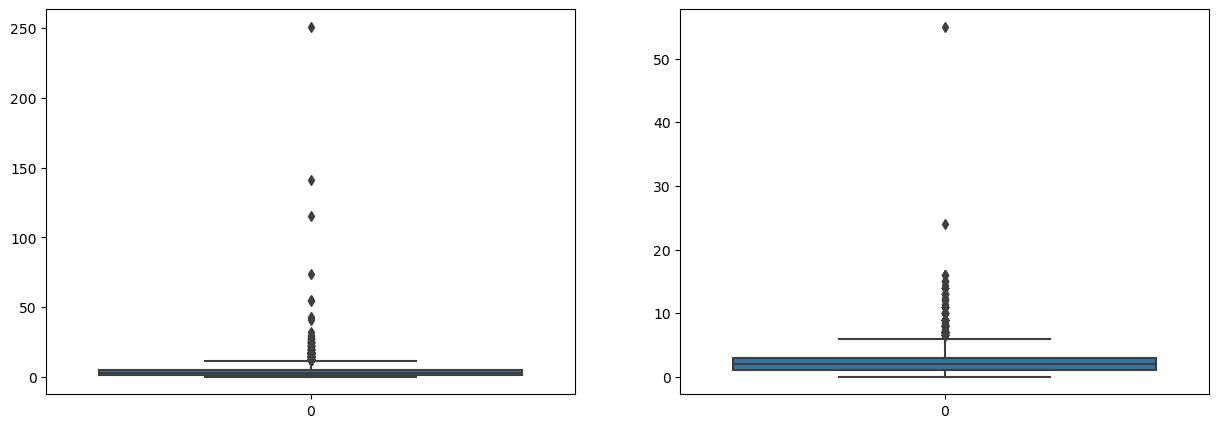

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [23]:
# For 'TotalVisits' and 'Page Views Per Visit'
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

df_leads[visit_list].describe()

From the above analysis, it can be seen that there is a lot of variation in both of the variables. As the percentage of missing values for both of them are less than 2%, it is better to drop the rows containing missing values. 

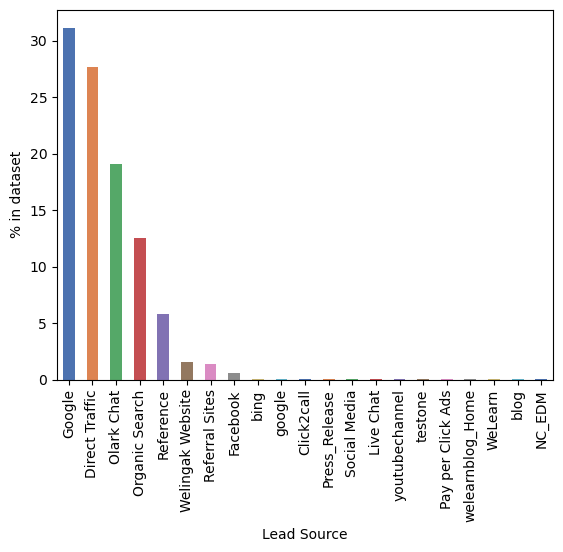

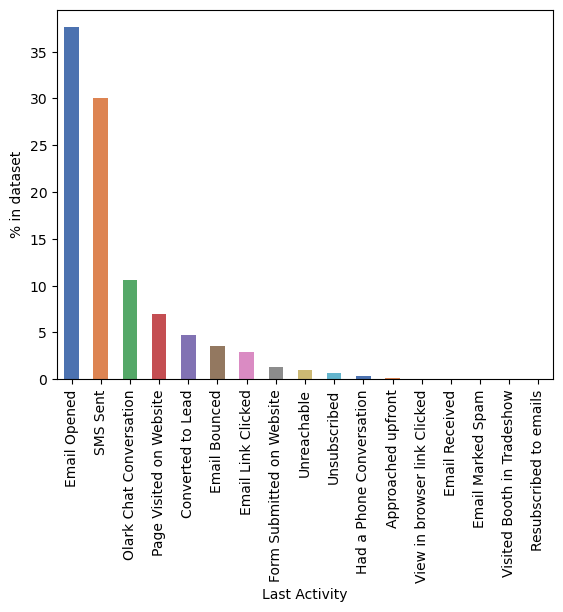

In [24]:
# For 'Lead Source' and 'Last Activity'
var_list = ['Lead Source', 'Last Activity']

for var in var_list:
    percent_plot(var)
    plt.show()

In these categorical variables, imputing with the most frequent value is not accurate as the next most frequent value has similar frequency. We'll drop the rows containing any missing values for above four variables.

In [25]:
# To drop the rows containing missing values
df_leads.dropna(inplace = True)

In [26]:
# To get percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

There are no more missing values. Data is cleaned!

### Data Visualization

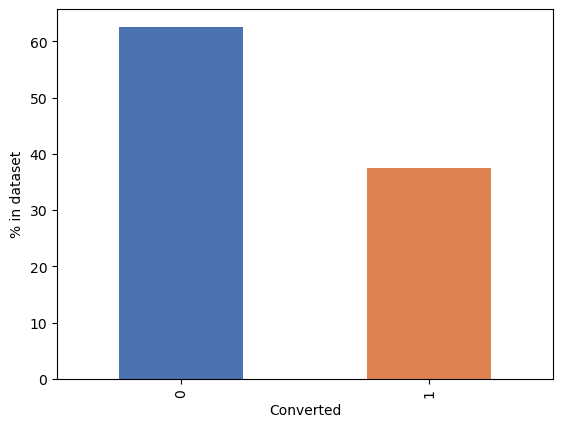

In [27]:
# For the target variable 'Converted'
percent_plot('Converted')

In [28]:
(sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100

37.41109530583215

37.8% of the 'Converted' data is 1 ie. 37.8% of the leads are converted. This means we have enough data of converted leads for modelling.

#### Visualising Numerical Variables and Outlier Treatment

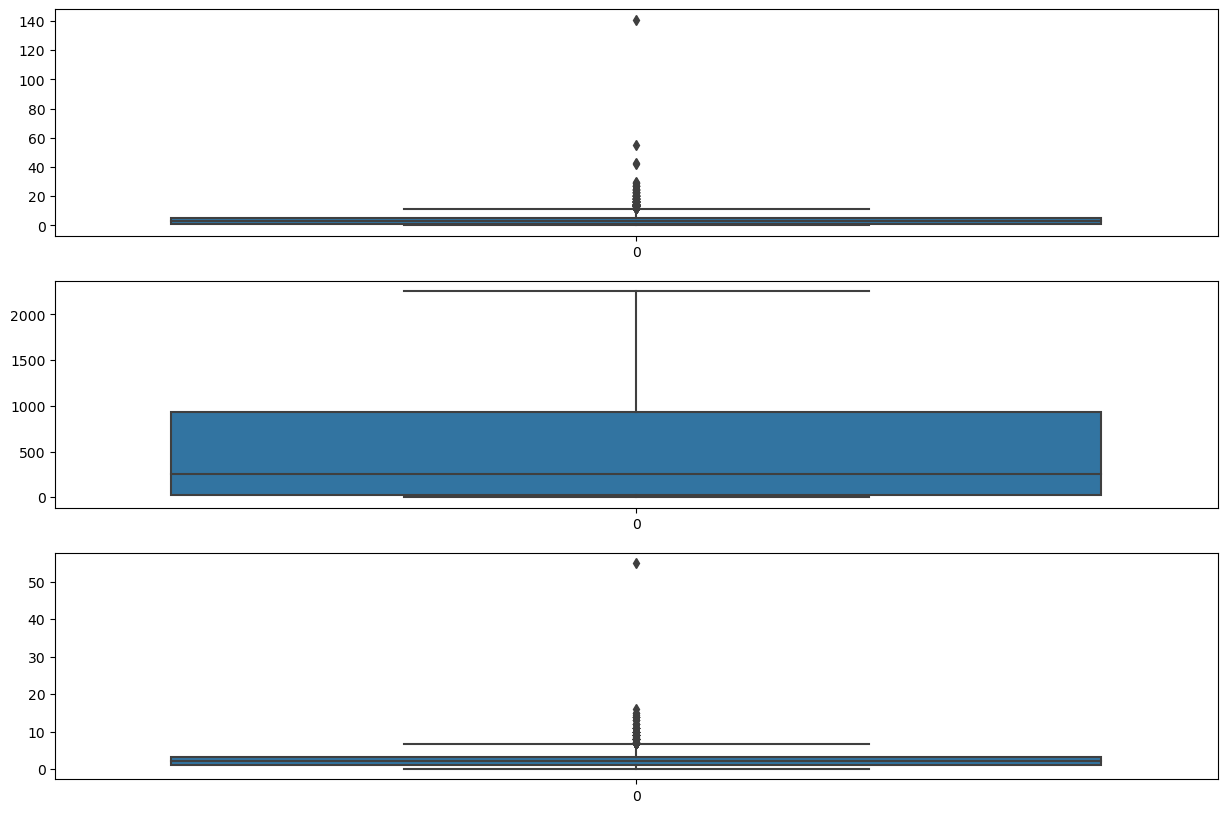

In [29]:
# Boxplots
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

In [30]:
df_leads[num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4921.000000,4921.000000,4921.000000
mean,3.564926,491.016054,2.408069
std,4.201033,547.477817,2.212106
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,19.000000,1.000000
50%,3.000000,255.000000,2.000000
75%,5.000000,936.000000,3.330000
90%,8.000000,1377.000000,5.000000
95%,10.000000,1565.000000,6.000000


From the boxplots, we can see that there are outliers present in the variables.
- For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.
- There are no significant outliers in 'Total Time Spent on Website'
<br>
We don't need to cap at 5% as the minimum value at 5% value are same for all the variables.

In [31]:
# Outlier treatment
percentile = df_leads['TotalVisits'].quantile([0.95]).values
df_leads['TotalVisits'][df_leads['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = df_leads['Page Views Per Visit'].quantile([0.95]).values
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] >= percentile[0]] = percentile[0]

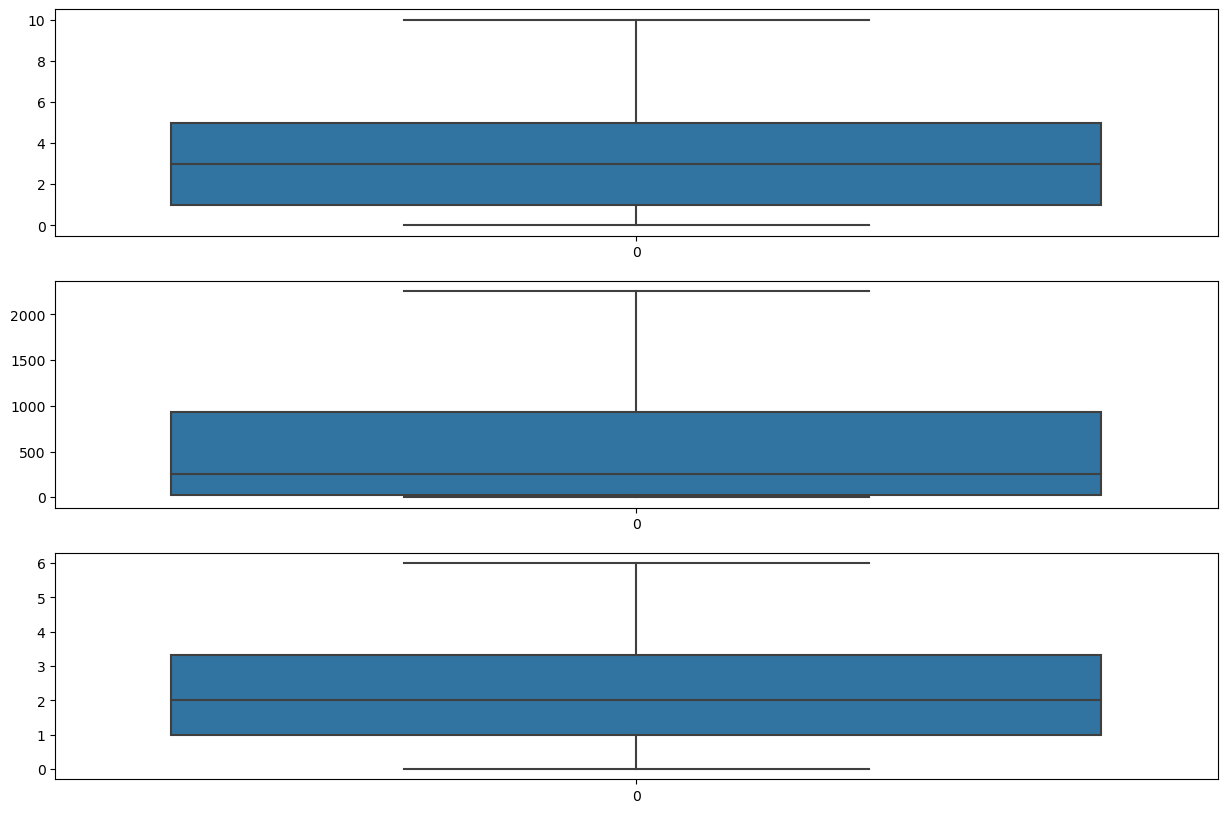

In [32]:
# Plot Boxplots to verify 
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

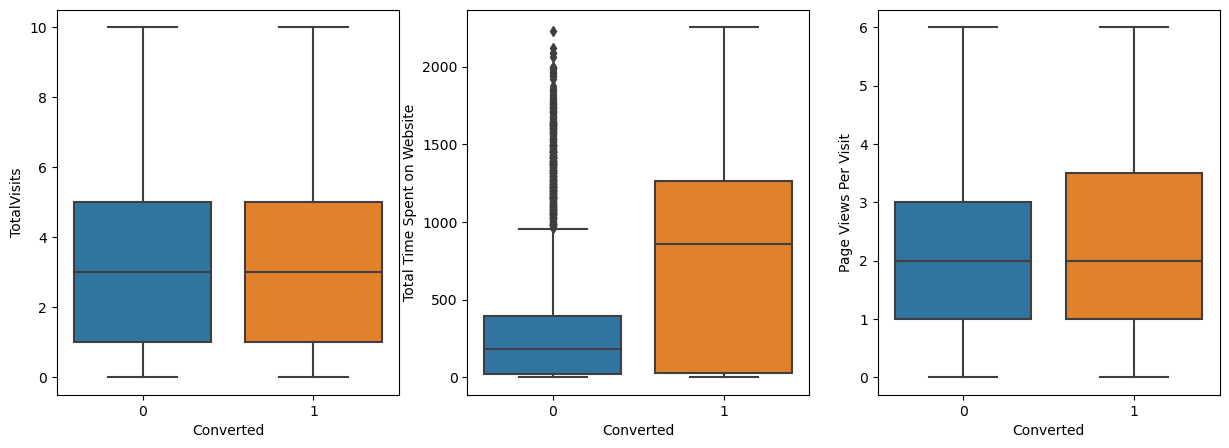

In [33]:
# To plot numerical variables against target variable to analyse relations
plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1,3,num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = df_leads)
plt.show()

Observations:
- 'TotalVisits' has same median values for both outputs of leads. No conclusion can be drawn from this.
- People spending more time on the website are more likely to be converted.
- 'Page Views Per Visit' also has same median values for both outputs of leads. Hence, inconclusive.

#### Visualising Categorical Variables

In [34]:
# Categorical variables
cat_var = list(df_leads.columns[df_leads.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

We saw percentage plots for categorical variables while cleaning the data. Here, we'll see these plots with respect to target variable 'Converted'

In [35]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = df_leads)
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = df_leads)
        plt.xticks(rotation = 90)
    plt.show()

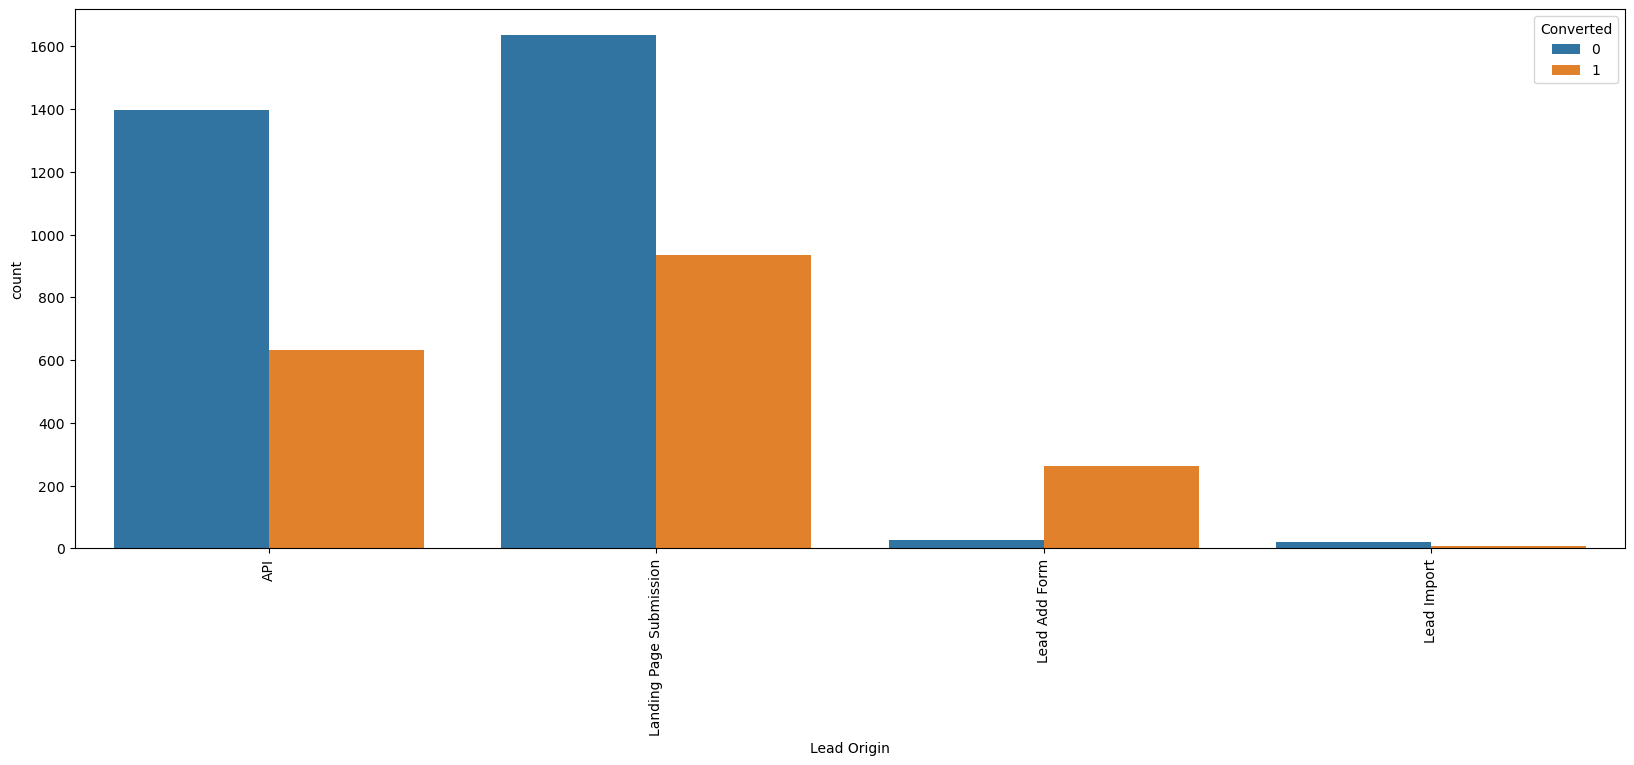

In [36]:
plot_cat_var(cat_var[0])

Observations for Lead Origin: <br>
'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. 'Lead Import' does not seem very significant.

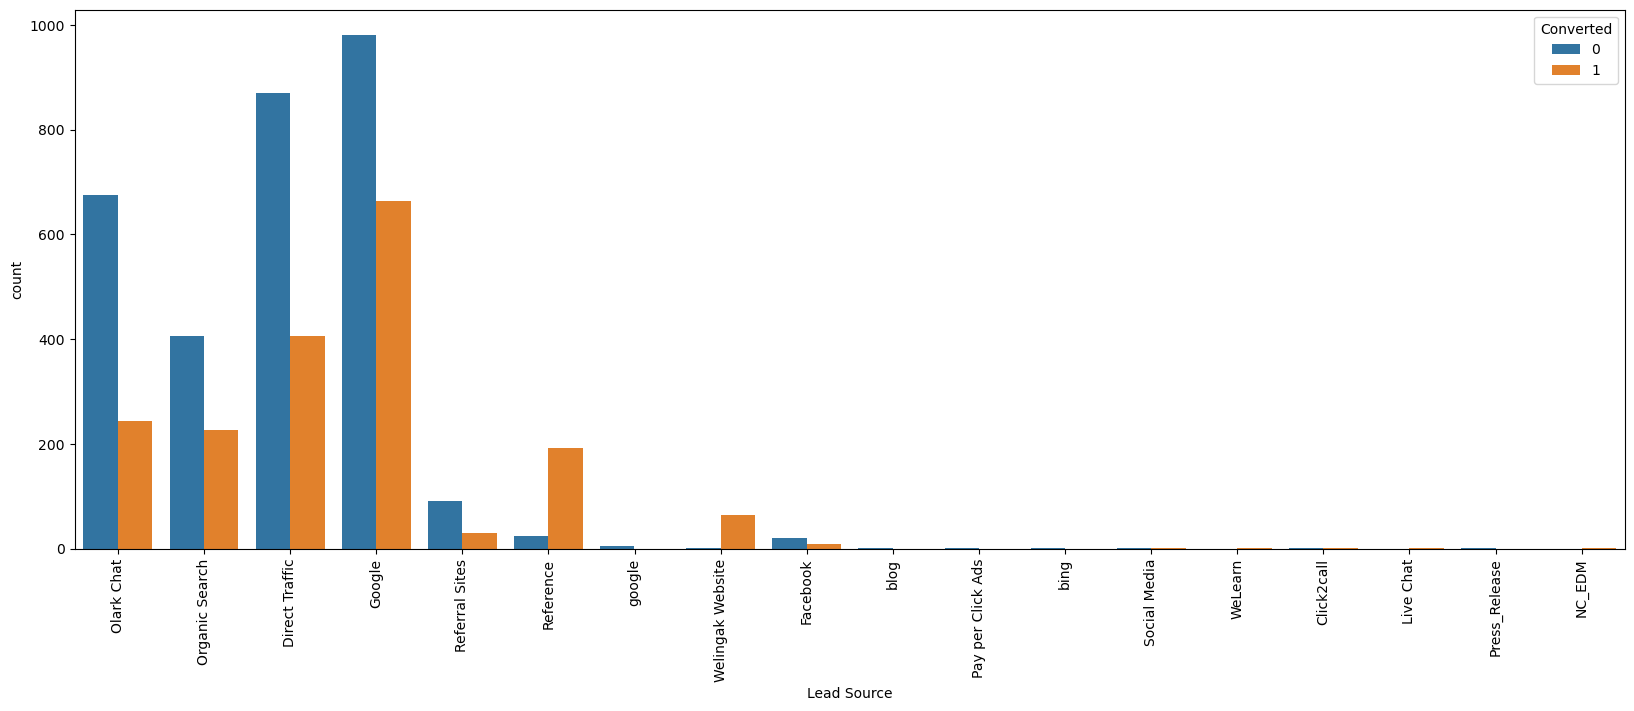

In [37]:
plot_cat_var(cat_var[1])

Observations for **Lead Source** : <br>
- Spelling error: We've to change 'google' to 'Google'
- As it can be seen from the graph, number of leads generated by many of the sources are negligible. There are sufficient      numbers till Facebook. We can convert all others in one single category of 'Others'.
- 'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.

In [38]:
# To correct spelling error
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['google'], 'Google')

In [39]:
categories = df_leads['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'Press_Release', 'NC_EDM'], dtype=object)

We can see that we require first eight categories.

In [40]:
# To reduce categories
df_leads['Lead Source'] = df_leads['Lead Source'].replace(categories[8:], 'Others')

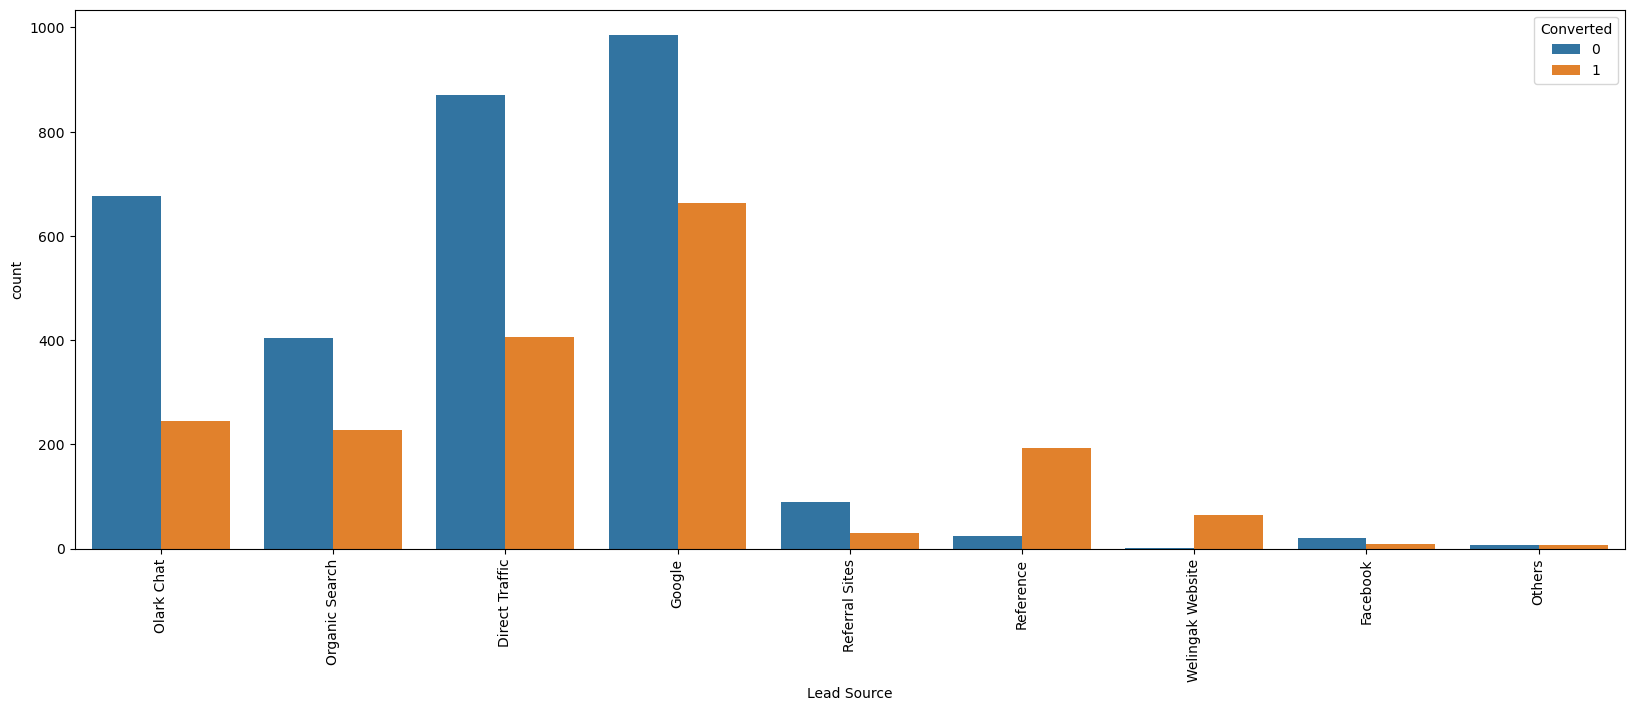

In [41]:
# To plot new categories
plot_cat_var(cat_var[1])

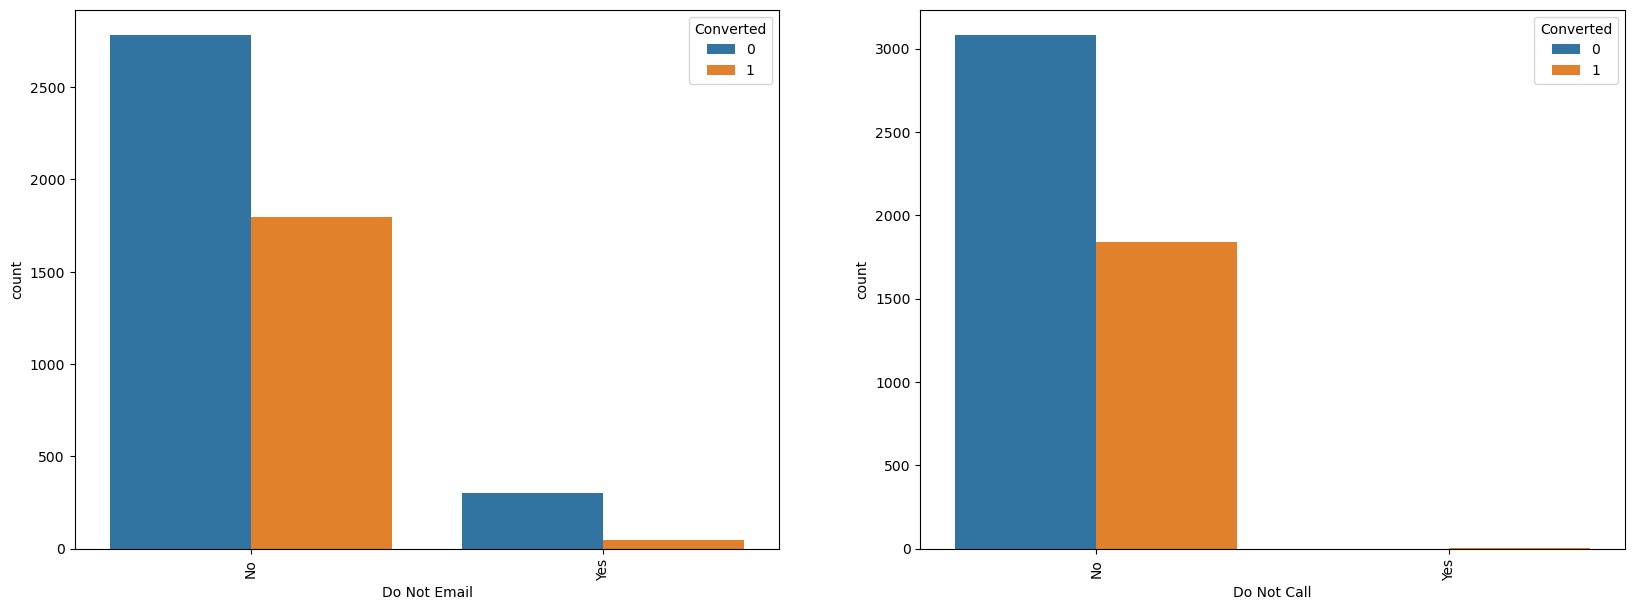

In [42]:
plot_cat_vars([cat_var[2],cat_var[3]])

Observations for **Do Not Email** and **Do Not Call** : <br>
As one can expect, most of the responses are 'No' for both the variables which generated most of the leads.

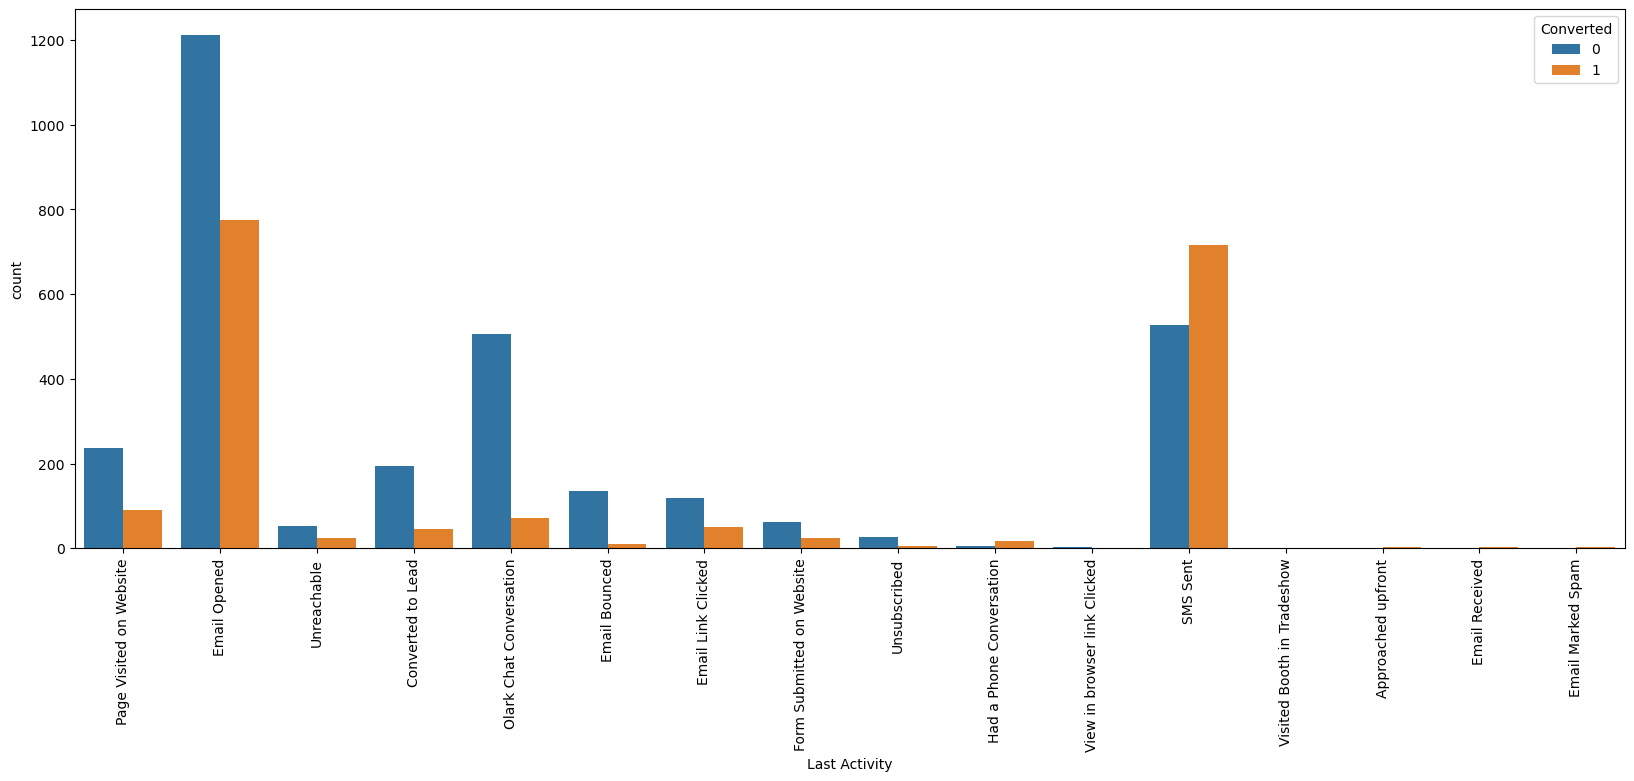

In [43]:
plot_cat_var(cat_var[4])

Observations for **Last Activity** : <br>
- Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.
- Categories after the 'SMS Sent' have almost negligible effect. We can aggregate them all in one single category.

In [44]:
categories = df_leads['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Email Received', 'Email Marked Spam'], dtype=object)

We can see that we do not require last five categories.

In [45]:
# To reduce categories
df_leads['Last Activity'] = df_leads['Last Activity'].replace(categories[-5:], 'Others')

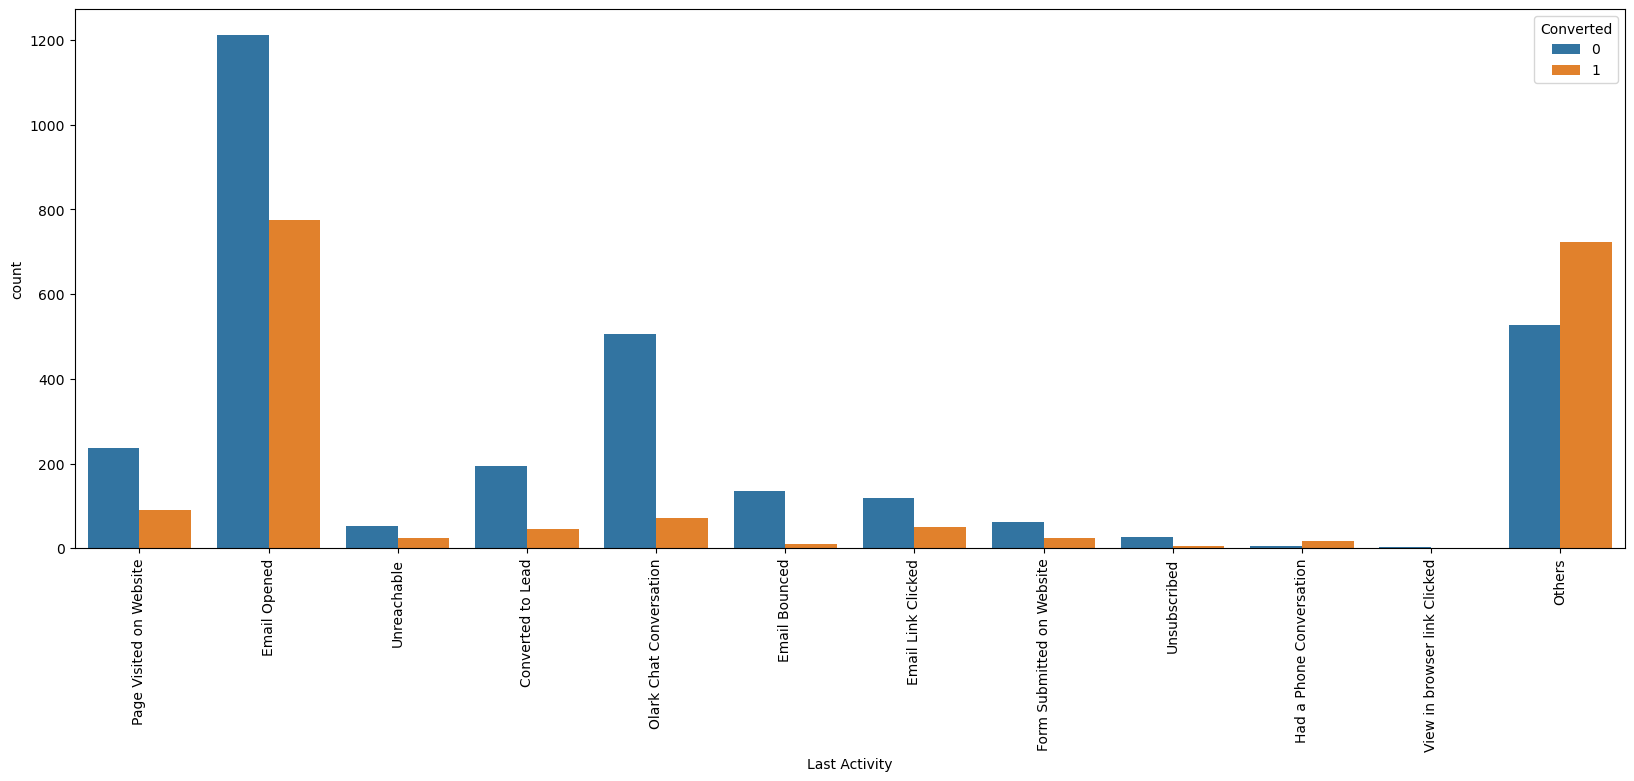

In [46]:
# To plot new categories
plot_cat_var(cat_var[4])

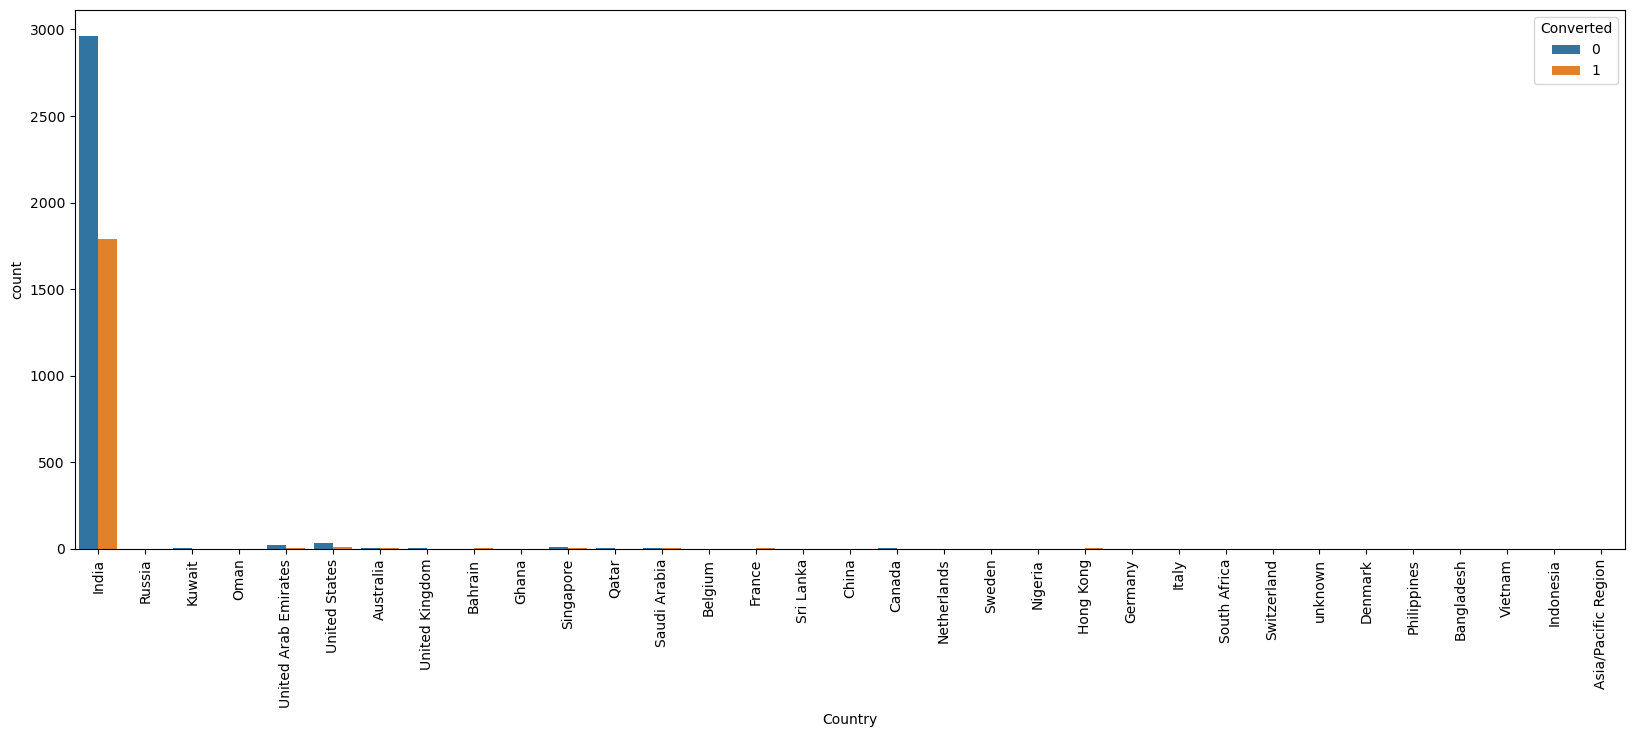

In [47]:
plot_cat_var(cat_var[5])

Observations for **Country** : <br>
Most of the responses are for India. Others are not significant.

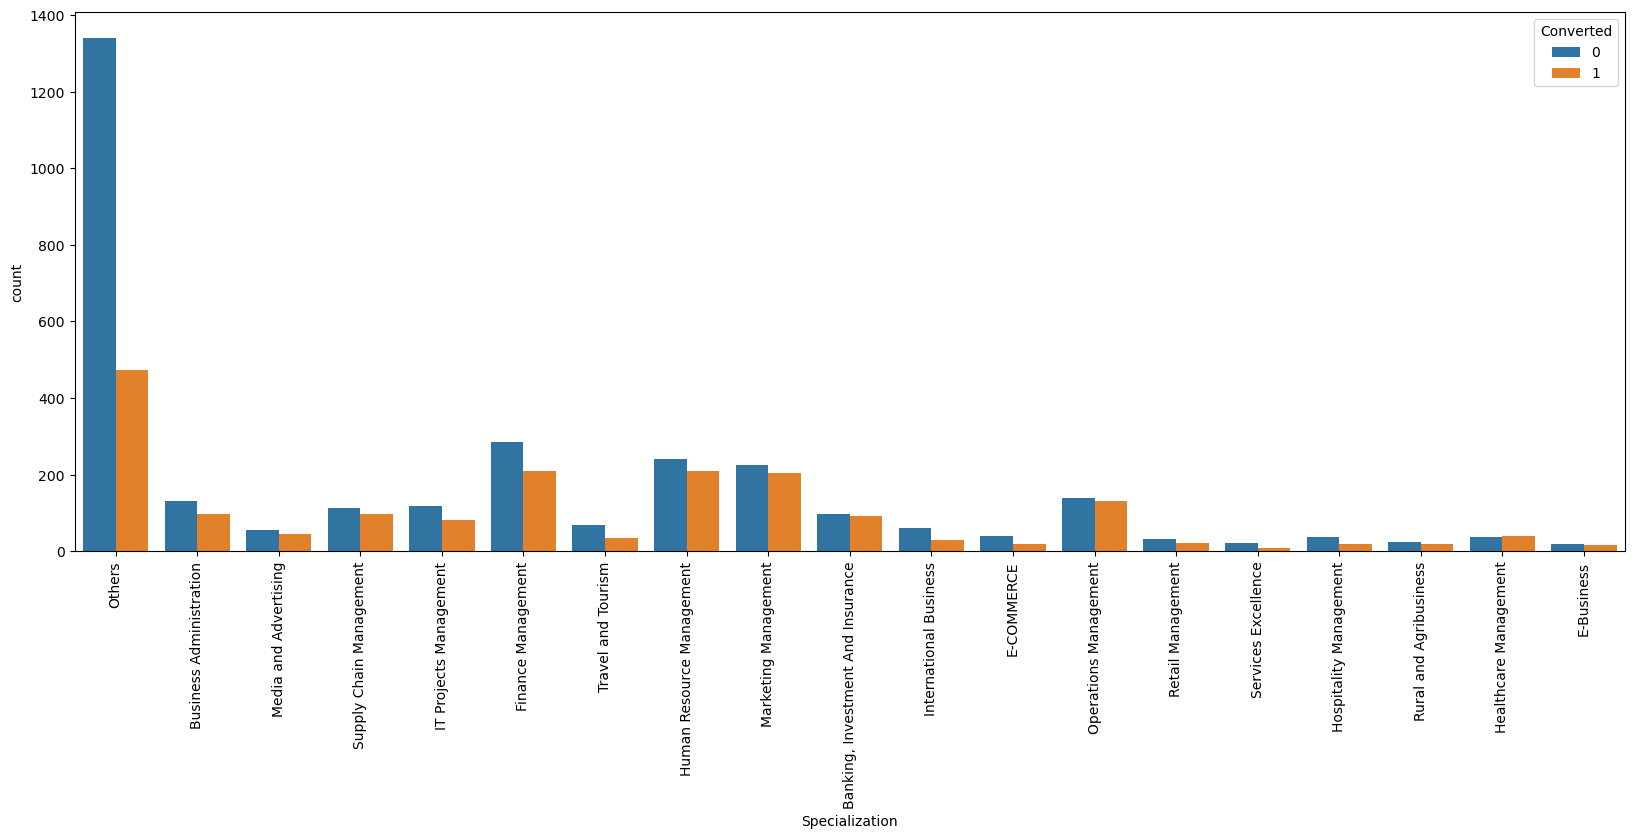

In [48]:
plot_cat_var(cat_var[6])

Observations for **Specialization** : <br>
Conversion rates are mostly similar across different specializations.

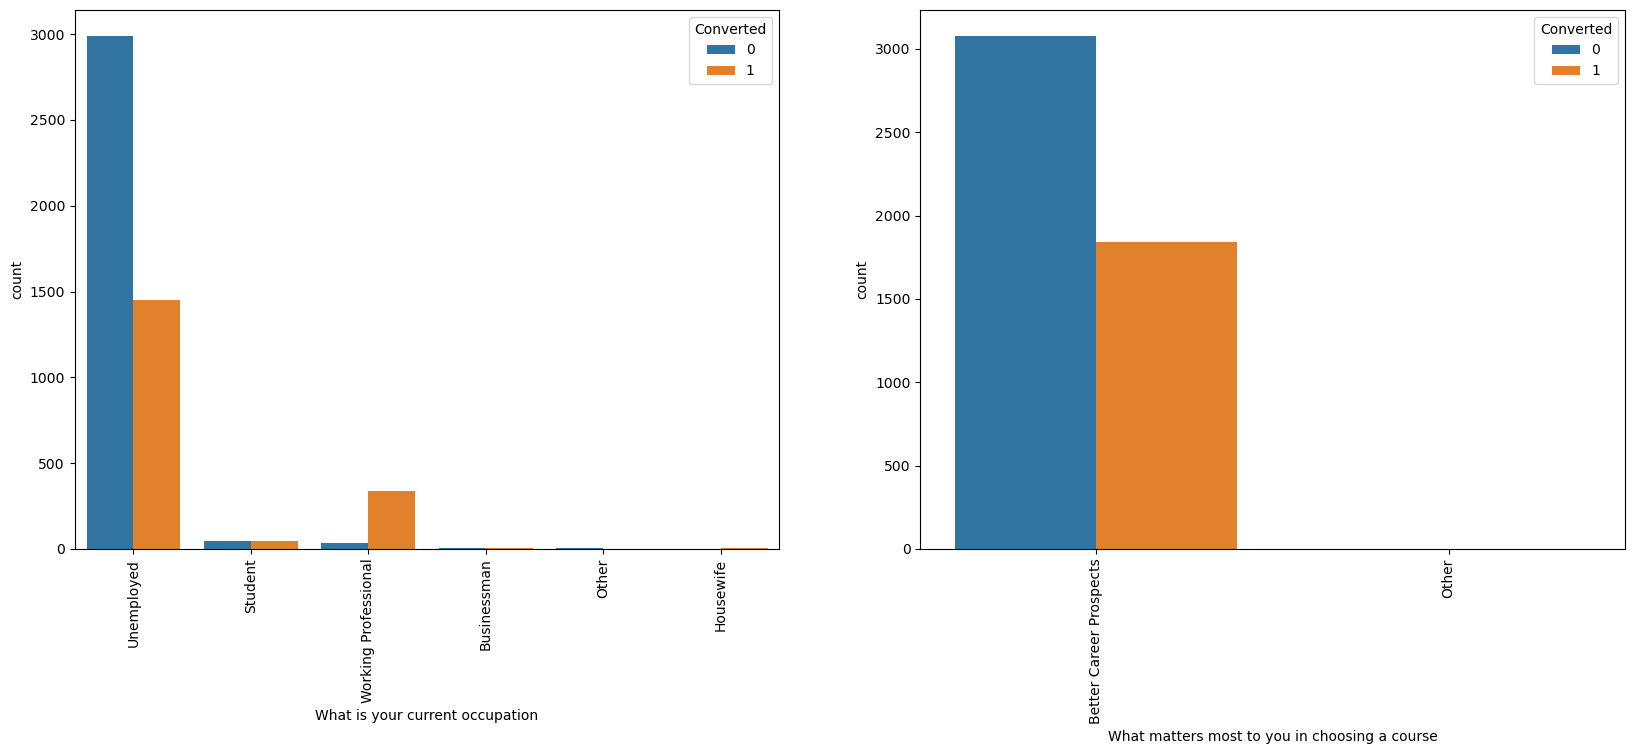

In [49]:
plot_cat_vars([cat_var[7],cat_var[8]])

Observations for **What is your current occupation** and **What matters most to you in choosing a course** : <br>
- The highest conversion rate is for 'Working Professional'. High number of leads are generated for 'Unemployed' but conversion rate is low.
- Variable 'What matters most to you in choosing a course' has only one category with significant count.

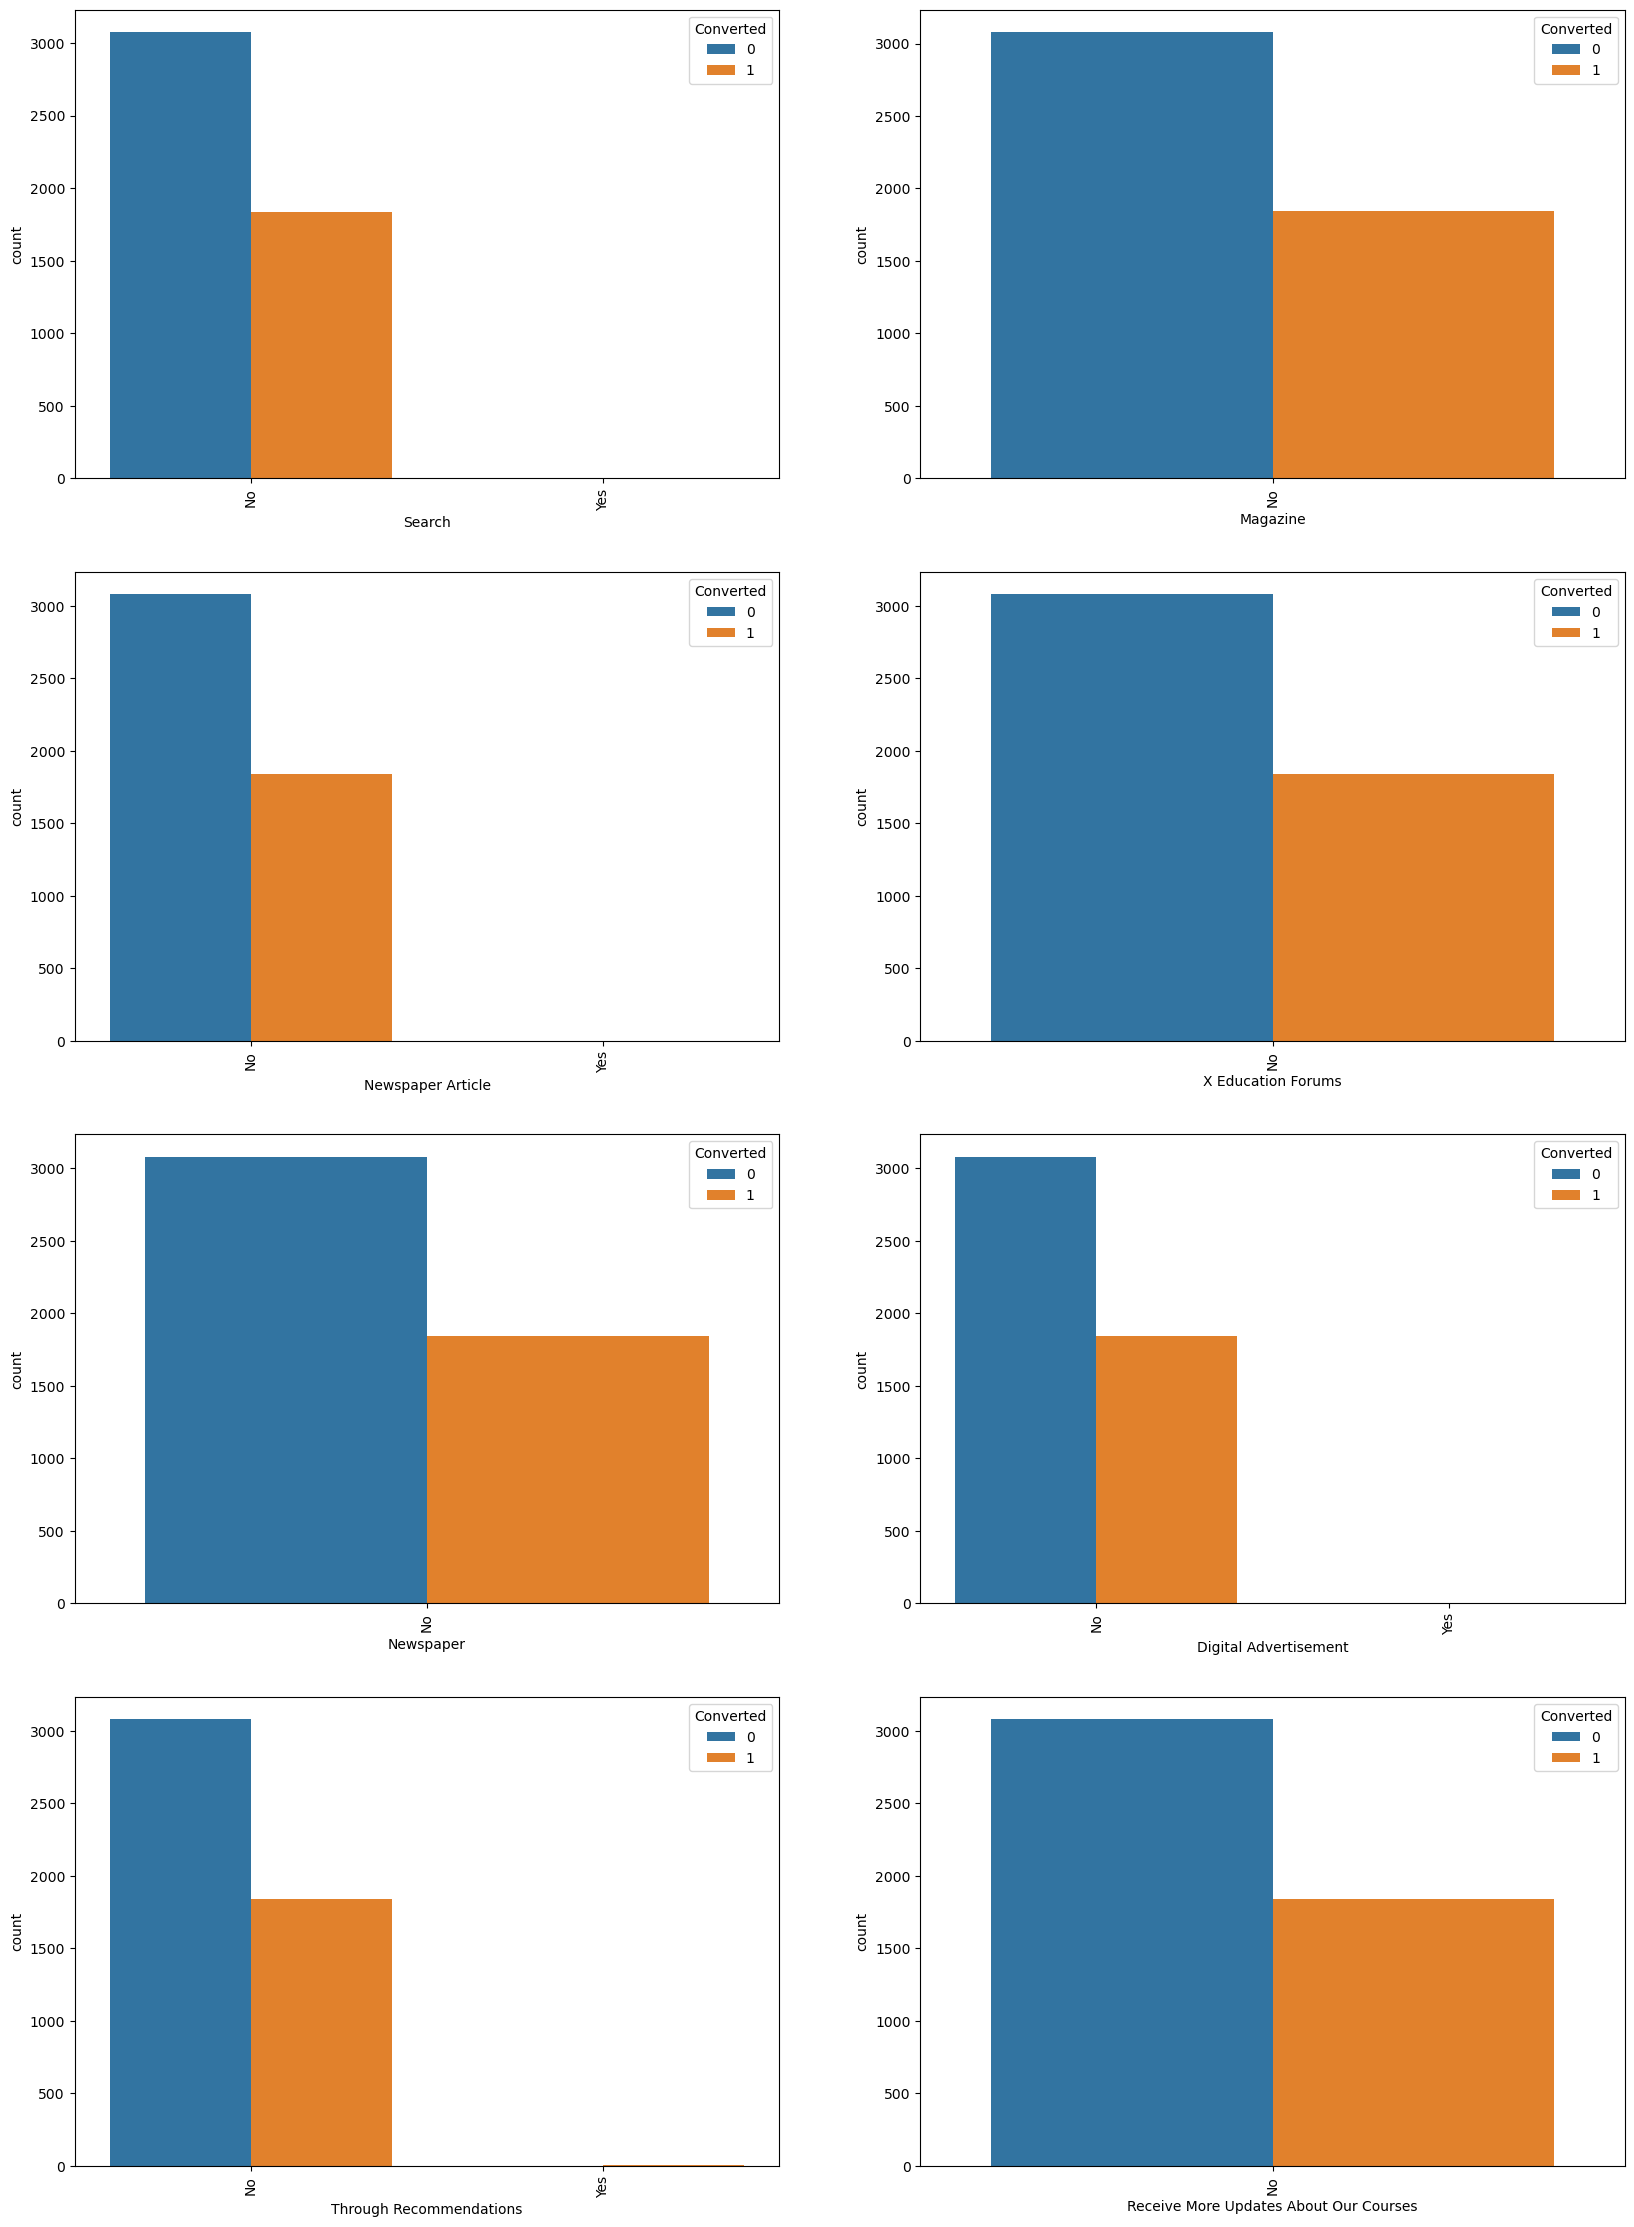

In [50]:
plot_cat_vars(cat_var[9:17])

Observations for **Search**, **Magazine**, **Newspaper Article**, **X Education Forums**, **Newspaper**, **Digital Advertisement**, **Through Recommendations**, and **Receive More Updates About Our Courses**: <br>
As all the above variables have most of the values as NO.

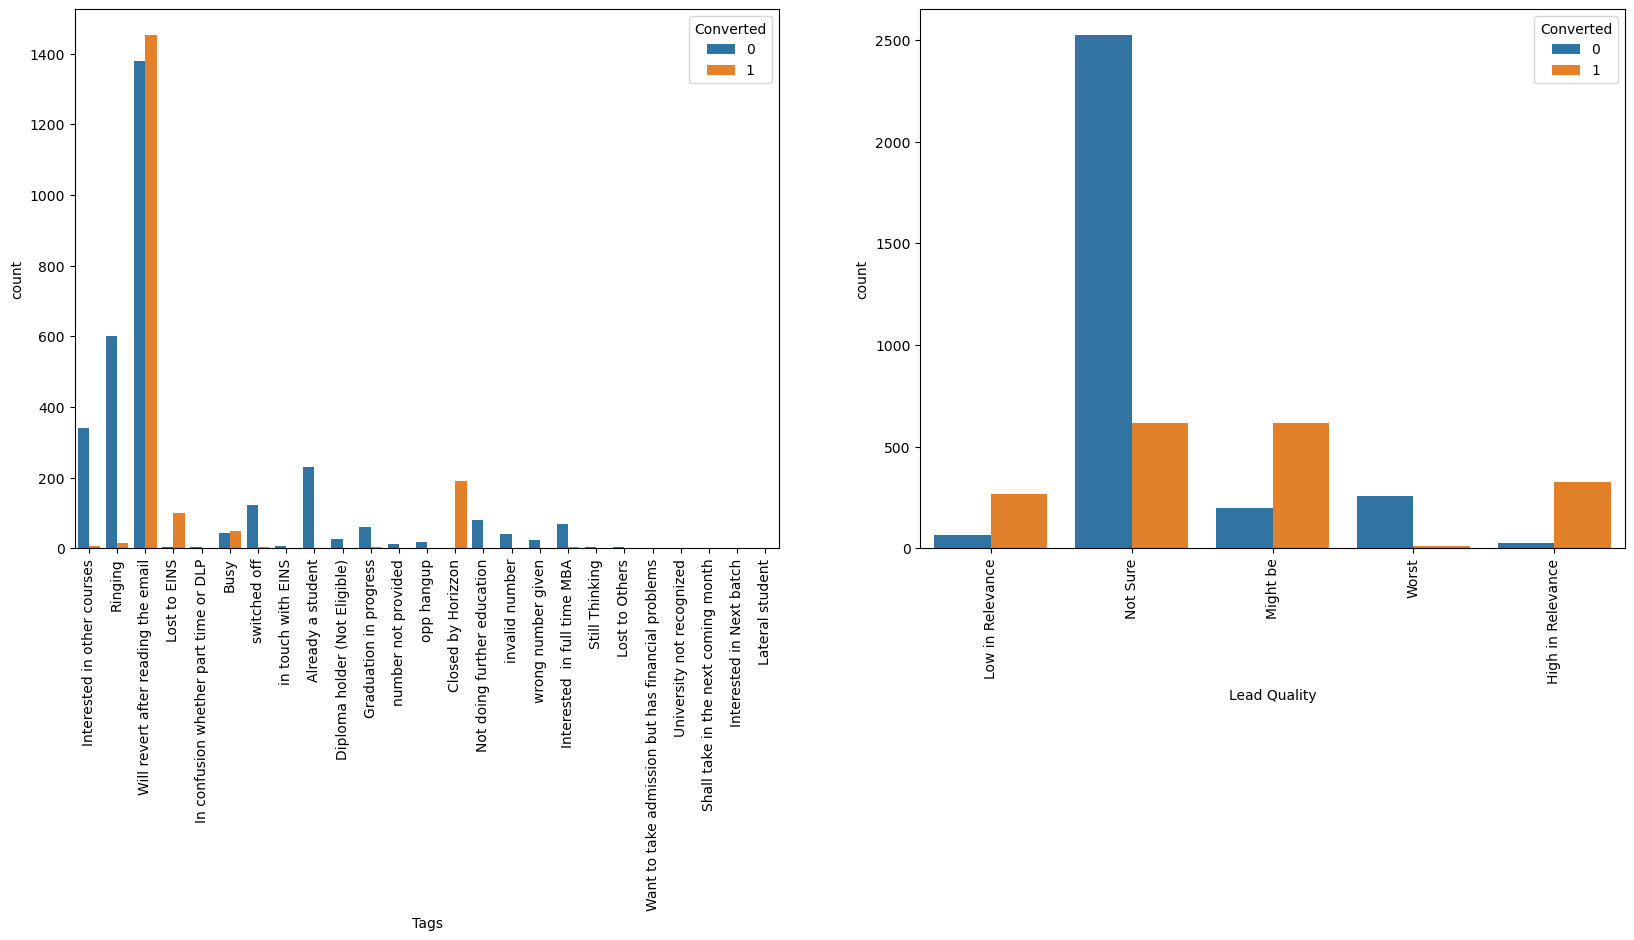

In [51]:
plot_cat_vars([cat_var[17],cat_var[18]])

Observations for **Tags** and **Lead Quality**: <br>
- In Tags, categories after 'Interested in full time MBA' have very few leads generated, so we can combine them into one single category.
- Most leads generated and the highest conversion rate are both attributed to the tag 'Will revert after reading the email'.

In [52]:
categories = df_leads['Tags'].unique()
categories

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Want to take admission but has financial problems',
       'University not recognized', 'Shall take in the next coming month',
       'Interested in Next batch', 'Lateral student'], dtype=object)

We can combine the last eight categories.

In [53]:
# To reduce categories
df_leads['Tags'] = df_leads['Tags'].replace(categories[-8:], 'Others')

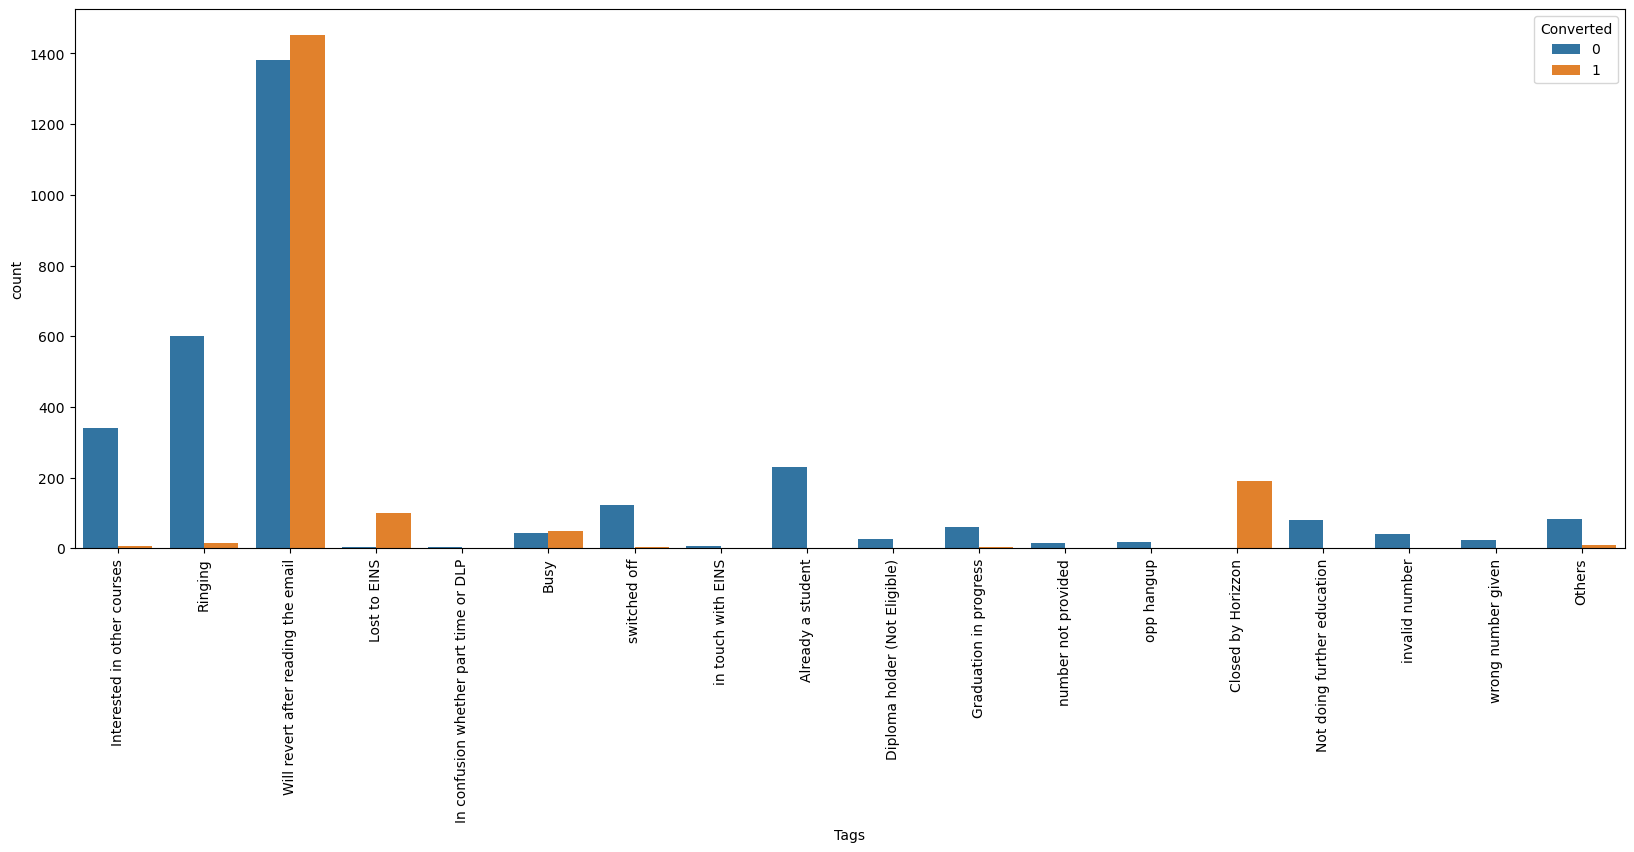

In [54]:
# To plot new categories
plot_cat_var(cat_var[17])

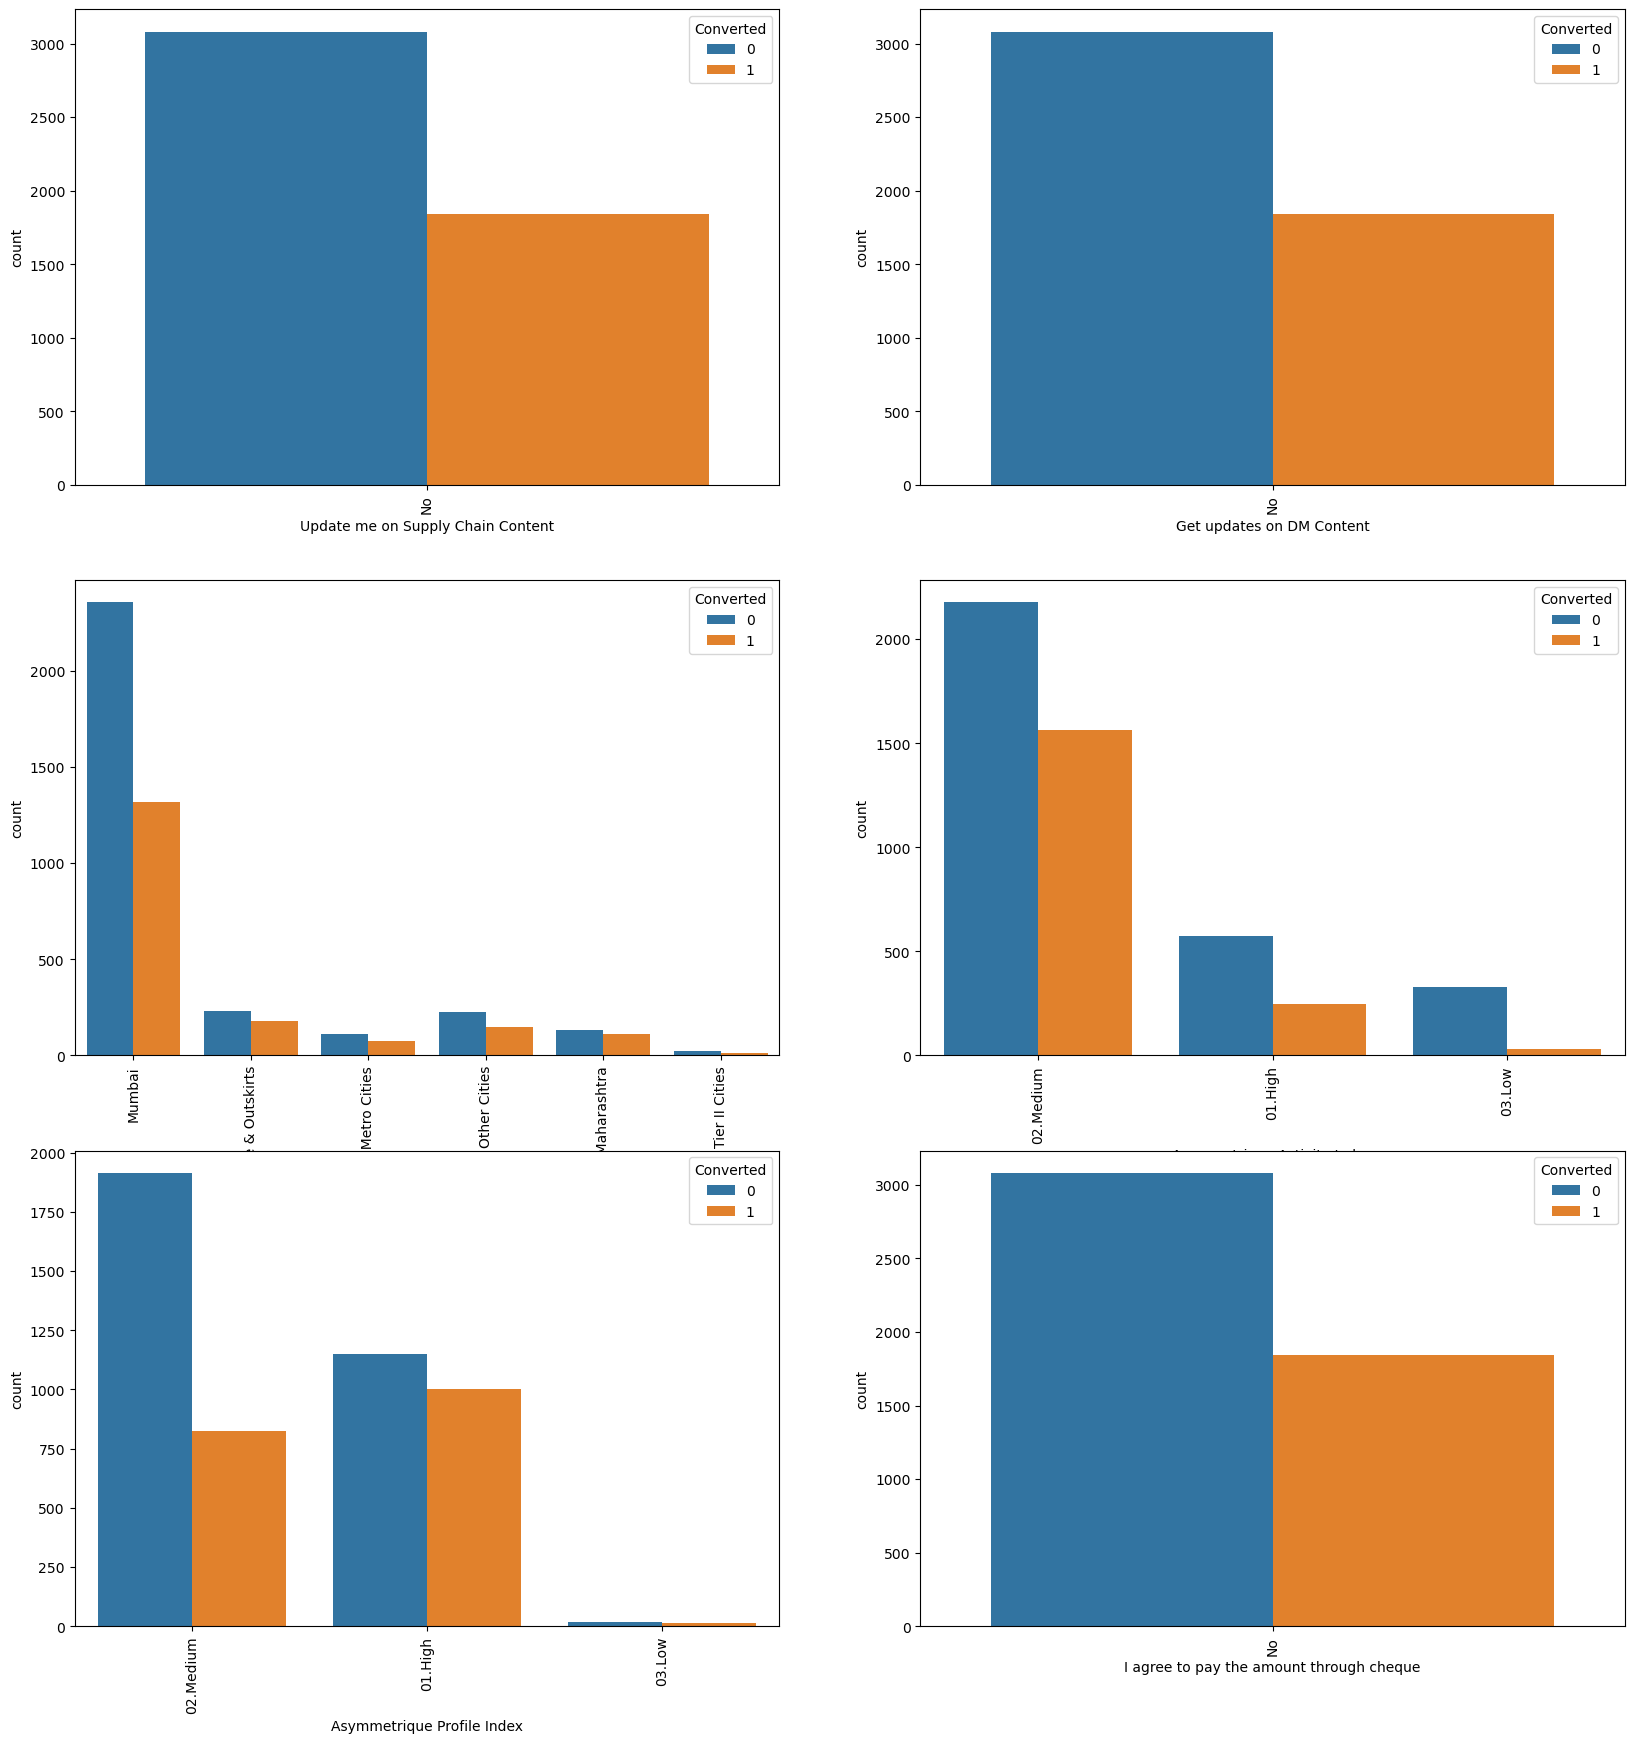

In [55]:
plot_cat_vars(cat_var[19:25])

Observations for **Update me on Supply Chain Content**, **Get updates on DM Content**, **City**, **I agree to pay the amount through cheque**, **A free copy of Mastering The Interview**, and **Last Notable Activity** : <br>
- Most of these variables are insignificant in analysis as many of them only have one significant category 'NO'.
- In 'A free copy of Mastering The Interview', both categories have similar conversion rates.
- In 'Last Notable Activity', we can combine categories after 'SMS Sent' similar to the variable 'Last Activity'. It has most generated leads for the category 'Modified' while most conversion rate for 'SMS Sent' activity.

In [56]:
categories = df_leads['Last Notable Activity'].unique()
categories

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Email Received', 'Email Marked Spam'], dtype=object)

We can see that we do not require last six categories.

In [57]:
# To reduce categories
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].replace(categories[-6:], 'Others')

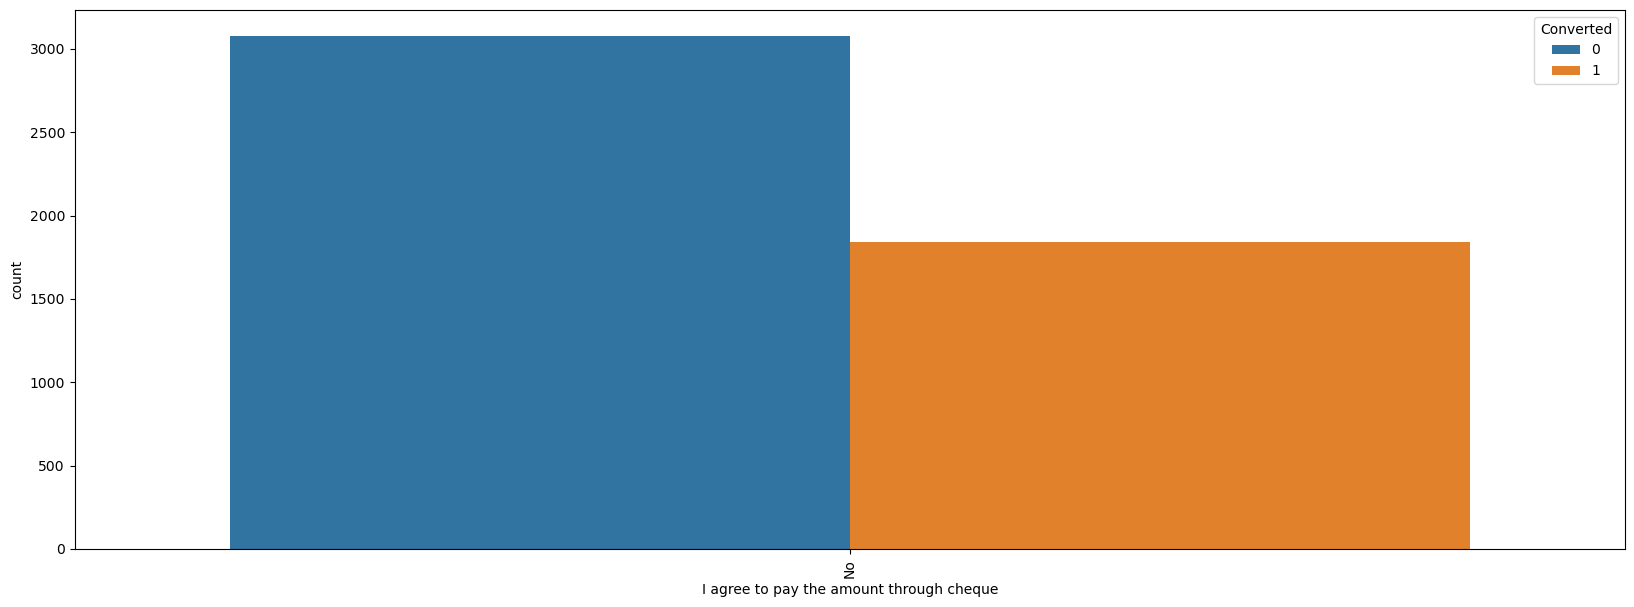

In [58]:
# To plot new categories
plot_cat_var(cat_var[24])

Based on the data visualization, we can drop the variables which are not significant for analysis.

In [59]:
df_leads = df_leads.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                          'Get updates on DM Content','I agree to pay the amount through cheque',
                          'A free copy of Mastering The Interview'],axis=1)

In [60]:
# Final dataframe
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,15.0,18.0,Modified


In [61]:
df_leads.shape

(4921, 18)

In [62]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4921 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      4921 non-null   object 
 1   Lead Source                      4921 non-null   object 
 2   Do Not Email                     4921 non-null   object 
 3   Converted                        4921 non-null   int64  
 4   TotalVisits                      4921 non-null   float64
 5   Total Time Spent on Website      4921 non-null   int64  
 6   Page Views Per Visit             4921 non-null   float64
 7   Last Activity                    4921 non-null   object 
 8   Specialization                   4921 non-null   object 
 9   What is your current occupation  4921 non-null   object 
 10  Tags                             4921 non-null   object 
 11  Lead Quality                     4921 non-null   object 
 12  City                     

In [63]:
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000
mean,0.374111,3.305019,491.016054,2.297175,14.314977,16.337330
std,0.483942,2.834069,547.477817,1.785482,1.396554,1.804918
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,19.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,255.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.330000,15.000000,18.000000
max,1.000000,10.000000,2253.000000,6.000000,18.000000,20.000000


### Data Preparation

In [64]:
# To convert binary variable (Yes/No) to 0/1
df_leads['Do Not Email'] = df_leads['Do Not Email'].map({'Yes': 1, 'No': 0})

#### Dummy Variable creation
For categorical variables with multiple levels, we create dummy features (one-hot encoded).

In [65]:
# Categorical variables
cat_var = list(df_leads.columns[df_leads.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Last Notable Activity']

In [66]:
# To create dummy variables and drop first ones
dummy = pd.get_dummies(df_leads[cat_var], drop_first=True)

# To add result to the original dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

# To drop the original variables
df_leads = df_leads.drop(cat_var,axis=1)

In [67]:
df_leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,15.0,15.0,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,0,0,5.0,674,2.5,15.0,15.0,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2,0,1,2.0,1532,2.0,14.0,20.0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0,0,1.0,305,1.0,13.0,17.0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,1,2.0,1428,1.0,15.0,18.0,True,False,False,...,False,False,False,False,False,True,False,False,False,False


### Train-Test Split

In [68]:
# Importing required package
from sklearn.model_selection import train_test_split

In [69]:
# To put feature variable to X
X = df_leads.drop(['Converted'],axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,15.0,15.0,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,0,5.0,674,2.5,15.0,15.0,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2,0,2.0,1532,2.0,14.0,20.0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0,1.0,305,1.0,13.0,17.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,2.0,1428,1.0,15.0,18.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [70]:
# To put response variable to y
y = df_leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [71]:
# To split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [72]:
# Importing required package
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
# Numerical variables
num_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [75]:
#Applying scaler to all numerical columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2378,0,2.362582,0.866192,0.537172,15.0,17.0,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8875,0,-0.104269,-0.887362,-0.439861,14.0,15.0,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
4303,0,-0.104269,0.202978,0.397596,16.0,15.0,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
8299,1,-0.809084,1.486154,-0.719013,13.0,15.0,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3612,0,0.952953,-0.431402,-0.160709,14.0,19.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [76]:
# To check the conversion rate
conversion = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
conversion

37.41109530583215

We have 37.85% conversion rate.

### Building the Model

After the creation of dummy variables, we have a large number of features. It is better to use RFE for feature elimination.

#### Feature Selection using RFE

In [77]:
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [78]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [79]:
# To check output of RFE
rfe.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False])

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('TotalVisits', False, 70),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 55),
 ('Asymmetrique Activity Score', False, 18),
 ('Asymmetrique Profile Score', False, 45),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Source_Facebook', False, 49),
 ('Lead Source_Google', False, 51),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 47),
 ('Lead Source_Others', False, 29),
 ('Lead Source_Reference', False, 61),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 30),
 ('Last Activity_Email Link Clicked', False, 35),
 ('Last Activity_Email Opened', False, 73),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Had a Phone Conversation', False, 63),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Act

In [81]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Others', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified'],
      dtype='object')

In [82]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_

#### Assessing the Model with StatsModels

In [83]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [85]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [86]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [87]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

MODEL 1 <br>
Running the first model by using the features selected by RFE

In [88]:
X1, logm1 = build_model(X_train[col].astype(float),y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3444
Model:                            GLM   Df Residuals:                     3428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -887.00
Date:                Wed, 15 Nov 2023   Deviance:                       1774.0
Time:                        23:21:23   Pearson chi2:                 2.24e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5556
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

`Tags_invalid number` has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

MODEL 2

In [89]:
col1 = col.drop('Tags_Closed by Horizzon',1)

# To rebuild the model
X2, logm2 = build_model(X_train[col1].astype(float),y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3444
Model:                            GLM   Df Residuals:                     3429
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1009.2
Date:                Wed, 15 Nov 2023   Deviance:                       2018.3
Time:                        23:21:25   Pearson chi2:                 5.00e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5230
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

`Tags_number not provided` has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

MODEL 3

In [90]:
col2 = col1.drop('Tags_wrong number given',1)

# To rebuild the model
X3, logm3 = build_model(X_train[col2].astype(float),y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3444
Model:                            GLM   Df Residuals:                     3430
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1017.2
Date:                Wed, 15 Nov 2023   Deviance:                       2034.4
Time:                        23:21:26   Pearson chi2:                 4.99e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5207
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

`Tags_wrong number given` has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

MODEL 4

In [91]:
col3 = col2.drop('Lead Source_Olark Chat',1)

# To rebuild the model
X4, logm4 = build_model(X_train[col3].astype(float),y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3444
Model:                            GLM   Df Residuals:                     3431
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1017.3
Date:                Wed, 15 Nov 2023   Deviance:                       2034.6
Time:                        23:21:28   Pearson chi2:                 4.94e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5207
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

All of the features have p-value close to zero i.e. they all seem significant.

We also have to check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present.

<Axes: >

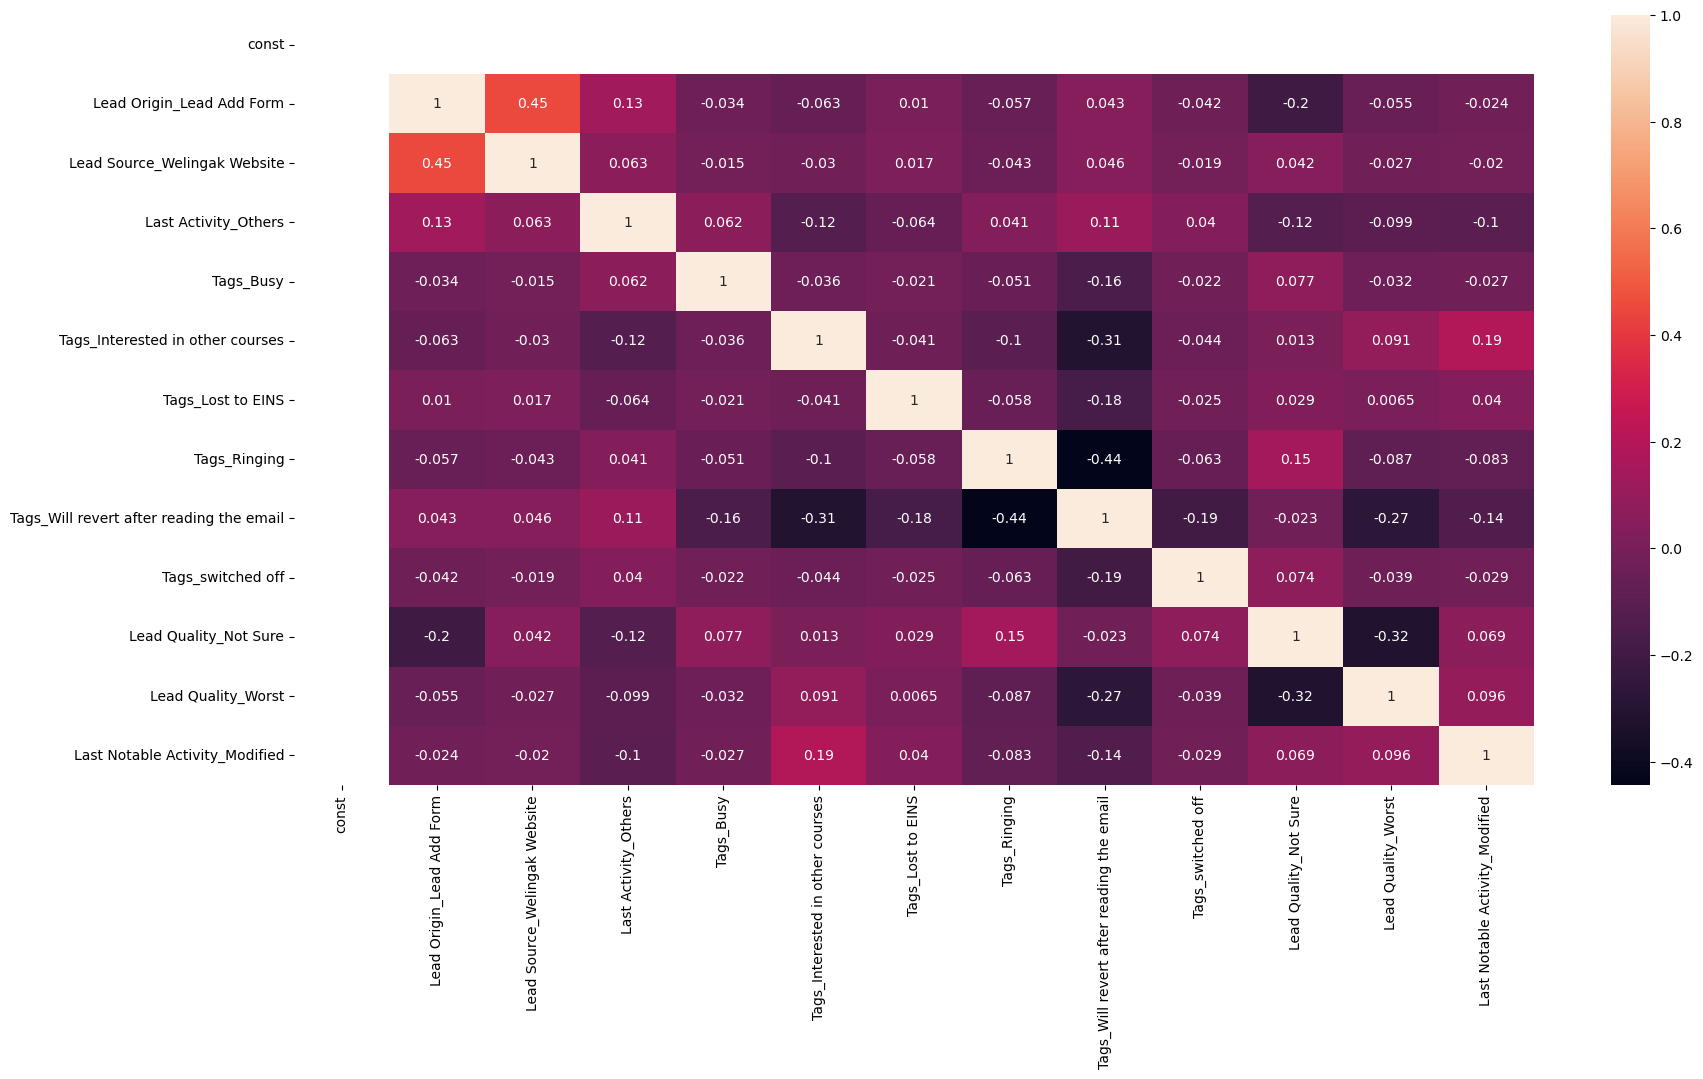

In [92]:
# To plot correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X4.corr(),annot = True)

From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF. These features seem important from the business aspect as well. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [93]:
# To get predicted values on train set
y_train_pred_final = get_pred(X4,logm4)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,1,0.654051,2378,1
1,0,0.103346,8875,0
2,0,0.263157,4303,0
3,0,0.022541,8299,0
4,0,0.049284,3612,0


In [94]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[2061   81]
 [ 269 1033]]
Training Accuracy:  0.8983739837398373


This is our **final model**:
1. All p-values are very close to zero.
2. VIFs for all features are very low. There is hardly any multicollinearity present.
3. Training accuracy of **89.8%** at a probability threshold of 0.05 is also very good.

### Metrics beyond simply Accuracy

In [95]:
other_metrics(confusion)

Sensitivity:  0.793394777265745
Specificity:  0.9621848739495799
False postive rate - predicting the lead conversion when the lead does not convert:  0.037815126050420166
Positive predictive value:  0.9272890484739676
Negative predictive value:  0.884549356223176


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity.
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [96]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [97]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

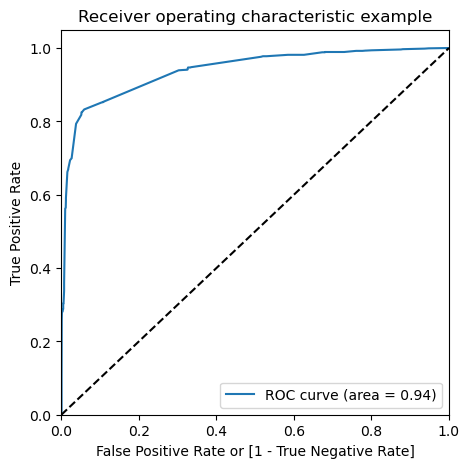

In [98]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [99]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9396138383668879


Area under curve (auc) is approximately 0.95 which is very close to ideal auc of 1.

### Finding Optimal Cutoff Point
Optimal cutoff probability is the prob where we get balanced sensitivity and specificity.

In [100]:
# To create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.654051,2378,1,1,1,1,1,1,1,1,0,0,0
1,0,0.103346,8875,0,1,1,0,0,0,0,0,0,0,0
2,0,0.263157,4303,0,1,1,1,0,0,0,0,0,0,0
3,0,0.022541,8299,0,1,0,0,0,0,0,0,0,0,0
4,0,0.049284,3612,0,1,0,0,0,0,0,0,0,0,0


In [101]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378049  1.000000  0.000000
0.1   0.1  0.670732  0.976190  0.485061
0.2   0.2  0.775842  0.940860  0.675537
0.3   0.3  0.878920  0.851767  0.895425
0.4   0.4  0.900987  0.824885  0.947246
0.5   0.5  0.898374  0.793395  0.962185
0.6   0.6  0.898374  0.793395  0.962185
0.7   0.7  0.869919  0.699693  0.973389
0.8   0.8  0.864111  0.669739  0.982260
0.9   0.9  0.835366  0.583717  0.988329


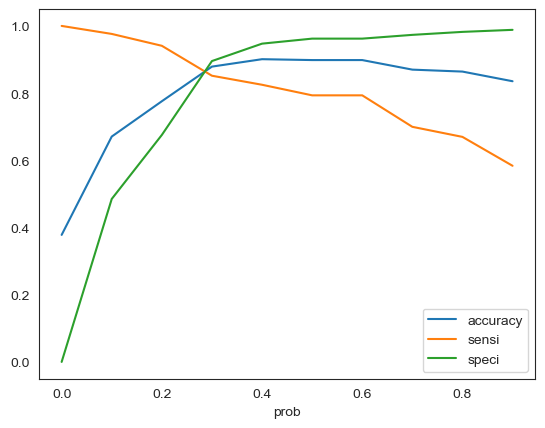

In [102]:
# To plot accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, **0.2 is the optimum point to take as a cutoff probability**.

In [103]:
# Using 0.2 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.654051,2378,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.103346,8875,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.263157,4303,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.022541,8299,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.049284,3612,0,1,0,0,0,0,0,0,0,0,0,0


In [104]:
# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[2029  113]
 [ 228 1074]]
Training Accuracy:  0.9009872241579558


In [105]:
# Other metrics
other_metrics(confusion2)

Sensitivity:  0.8248847926267281
Specificity:  0.9472455648926237
False postive rate - predicting the lead conversion when the lead does not convert:  0.052754435107376284
Positive predictive value:  0.9048020219039595
Negative predictive value:  0.898980948161276


##### Classification Report

In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2142
           1       0.90      0.82      0.86      1302

    accuracy                           0.90      3444
   macro avg       0.90      0.89      0.89      3444
weighted avg       0.90      0.90      0.90      3444



### Precision and Recall

Precision = TP / TP + FP

In [107]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9272890484739676

Recall = TP / TP + FN

In [108]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.793394777265745

Using sklearn utilities for the same:

In [109]:
from sklearn.metrics import precision_score, recall_score

In [110]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9272890484739676

In [111]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.793394777265745

### Precision and Recall Tradeoff

In [112]:
from sklearn.metrics import precision_recall_curve

In [113]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 3439    0
 3440    1
 3441    0
 3442    1
 3443    0
 Name: Converted, Length: 3444, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 3439    0
 3440    1
 3441    0
 3442    1
 3443    0
 Name: predicted, Length: 3444, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

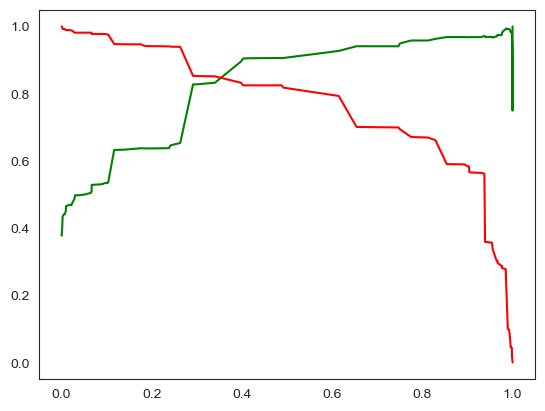

In [115]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve above, **0.25 is the optimum point to take as a cutoff probability using Precision-Recall**. We can check our accuracy using this cutoff too.

In [116]:
# Using 0.25 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,1,0.654051,2378,1,1,1,1,1,1,1,1,0,0,0,1,1
1,0,0.103346,8875,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.263157,4303,0,1,1,1,0,0,0,0,0,0,0,0,1
3,0,0.022541,8299,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.049284,3612,0,1,0,0,0,0,0,0,0,0,0,0,0


In [117]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[1494  648]
 [  79 1223]]
Training Accuracy:  0.7889082462253194


In [118]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.9393241167434716
Specificity:  0.6974789915966386
False postive rate - predicting the lead conversion when the lead does not convert:  0.3025210084033613
Positive predictive value:  0.6536611437733832
Negative predictive value:  0.9497774952320407


Accuracy and other metrics yield similar values for both the cutoffs. We'll use the cutoff of 0.2 as derived earlier for predictions on the test set.

-----------

In [119]:
# To select train set
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,1,0.654051,2378,1,1,1,1,1,1,1,1,0,0,0,1,1
1,0,0.103346,8875,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.263157,4303,0,1,1,1,0,0,0,0,0,0,0,0,1
3,0,0.022541,8299,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.049284,3612,0,1,0,0,0,0,0,0,0,0,0,0,0


In [120]:
# To drop unnecessary columns from train set
leads_train_pred = leads_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
leads_train_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,2378,1,0.654051,1
1,8875,0,0.103346,0
2,4303,0,0.263157,0
3,8299,0,0.022541,0
4,3612,0,0.049284,0


## lead score

In [121]:
# To get Lead Number column from original data
leads_original = df_leads_original[['Lead Number']]
leads_original.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


### Determining Feature Importance

In [122]:
# To display features with corresponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = logm4.params[1:]
new_params

Lead Origin_Lead Add Form                   2.27
Lead Source_Welingak Website                2.14
Last Activity_Others                        1.50
Tags_Busy                                   2.23
Tags_Interested in other courses           -2.93
Tags_Lost to EINS                           6.81
Tags_Ringing                               -3.76
Tags_Will revert after reading the email    1.61
Tags_switched off                          -3.45
Lead Quality_Not Sure                      -3.74
Lead Quality_Worst                         -4.62
Last Notable Activity_Modified             -1.13
dtype: float64

In [123]:
# Relative feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Origin_Lead Add Form                   33.27
Lead Source_Welingak Website                31.40
Last Activity_Others                        21.97
Tags_Busy                                   32.66
Tags_Interested in other courses           -42.99
Tags_Lost to EINS                          100.00
Tags_Ringing                               -55.20
Tags_Will revert after reading the email    23.62
Tags_switched off                          -50.67
Lead Quality_Not Sure                      -54.87
Lead Quality_Worst                         -67.81
Last Notable Activity_Modified             -16.60
dtype: float64

In [124]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Origin_Lead Add Form                   10
Lead Source_Welingak Website                 6
Last Activity_Others                         9
Tags_Busy                                    8
Tags_Interested in other courses             4
Tags_Lost to EINS                           11
Tags_Ringing                                 2
Tags_Will revert after reading the email     7
Tags_switched off                            1
Lead Quality_Not Sure                        3
Lead Quality_Worst                           0
Last Notable Activity_Modified               5
dtype: int64

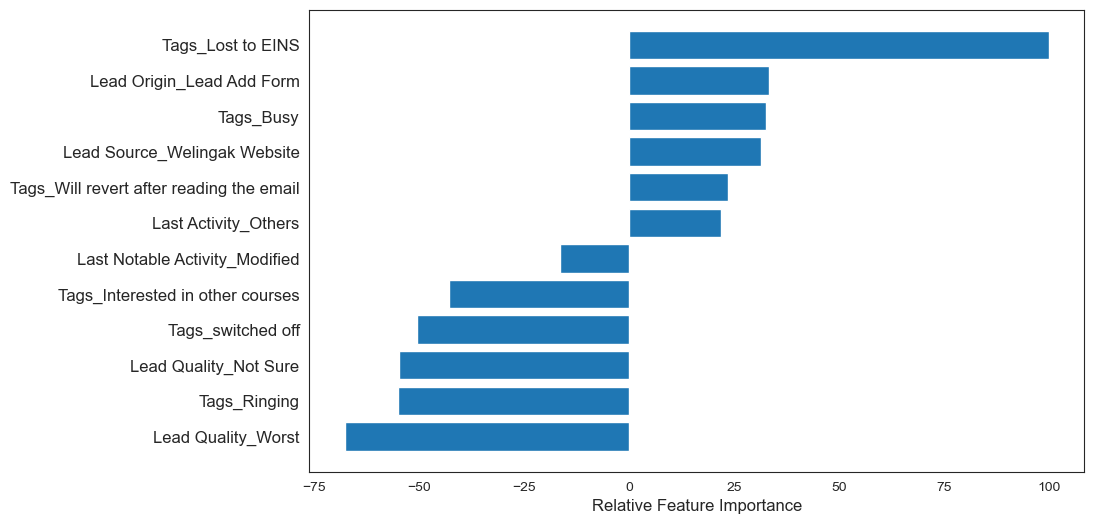

In [125]:
# To plot features with their relative importance
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col3].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

### Conclusion

It was found that the variables that mattered the most in the potential buyers are:
1. The total time spend on the Website. 
2. Total number of visits. 
3. When the lead source was:
a. Google
b. Direct traffic
c. Organic search
d. Welingak website
4. When the last activity was:
a. SMS
b. Olark chat conversation
5. When the lead origin is Lead add format. 
6. When their current occupation is as a working professional.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential 
buyers to change their mind and buy their courses.